# Clustering Algorithms
In this jupyter notebook, two clustering algorithms are used (k-means and Expectation maximization) on two datasets: drybean and ufc_data for classification purpose.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

## Data preprocessing

In [2]:
df_ufc = pd.read_csv('ufc_data.csv')
print("Data has", len(df_ufc), "rows and", len(df_ufc.columns), "columns.")
if df_ufc.isnull().values.any():
    print("Warning: Missing Data")
df_ufc.head()

Data has 3592 rows and 160 columns.


Winner  title_bout  no_of_rounds  B_current_lose_streak  \
0    Red        True             5                    0.0   
1    Red        True             5                    0.0   
2    Red       False             3                    0.0   
3   Blue       False             3                    0.0   
4   Blue       False             3                    0.0   

   B_current_win_streak  B_draw  B_avg_BODY_att  B_avg_BODY_landed  \
0                   4.0     0.0        9.200000           6.000000   
1                   3.0     0.0       14.600000           9.100000   
2                   3.0     0.0       15.354839          11.322581   
3                   4.0     0.0       17.000000          14.000000   
4                   1.0     0.0       17.000000          14.500000   

   B_avg_CLINCH_att  B_avg_CLINCH_landed  ...  \
0          0.200000             0.000000  ...   
1         11.800000             7.300000  ...   
2          6.741935             4.387097  ...   
3         13.750000            11.000000  ...   
4          2.500000             2.000000  ...   

   weight_class_Women's Strawweight  B_Stance_Open Stance  B_Stance_Orthodox  \
0                                 0                     0                  1   
1                                 0                     0                  1   
2                                 0                     0                  1   
3                                 0                     0                  0   
4                                 0                     0                  0   

   B_Stance_Sideways  B_Stance_Southpaw  B_Stance_Switch  \
0                  0                  0                0   
1                  0                  0                0   
2                  0                  0                0   
3                  0                  0                1   
4                  0                  1                0   

   R_Stance_Open Stance  R_Stance_Orthodox  R_Stance_Southpaw  R_Stance_Switch  
0                     0                  1                  0                0  
1                     0                  0                  1                0  
2                     0                  1                  0                0  
3                     0                  1                  0                0  
4                     0                  0                  1                0  

[5 rows x 160 columns]

In [3]:
df_bean = pd.read_excel('Dry_Bean_Dataset.xlsx')
print("Data has", len(df_bean), "rows and", len(df_bean.columns), "columns.")
if df_bean.isnull().values.any():
    print("Warning: Missing Data")
df_bean.head()

Data has 13611 rows and 17 columns.


Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

ufc dataset is binary classification problem, while the drybean dataset is multi-classification problem.

In [4]:
# the target in ufc dataset is winner which has red and blue
# change red to 0, and blue to 1
# drop the no_of_rounds because unknown in the beginning
df_ufc.loc[df_ufc["Winner"] == "Red", "Winner"] = 0
df_ufc.loc[df_ufc["Winner"] == "Blue", "Winner"] = 1
df_ufc.drop(["no_of_rounds"], axis=1 ,inplace=True)
# al zero
df_ufc.drop(["B_draw"], axis=1 ,inplace=True)
df_ufc.drop(["R_draw"], axis=1 ,inplace=True)

0    2380
1    1212
Name: Winner, dtype: int64


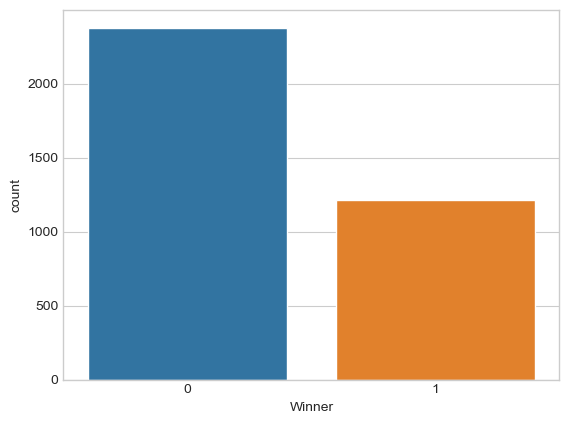

In [5]:
print(df_ufc['Winner'].value_counts())
_ = sns.countplot(x='Winner', data=df_ufc)

In [6]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
# ufc dataset preparation
X_ufc = df_ufc.drop(['Winner'], axis=1)
y_ufc = df_ufc.Winner
#X_ufc_train, X_ufc_test, y_ufc_train, y_ufc_test = train_test_split(np.array(X_ufc), np.array(y_ufc), test_size = 0.2, random_state = 100, stratify=y_ufc)

In [7]:
# dry bean dataset preparation
# turn categorical class type into numerical values
le = LabelEncoder()
df_bean['Class'] = le.fit_transform(df_bean['Class'])

X_dry = df_bean.drop(['Class'], axis=1)
y_dry = df_bean.Class

# Data Split
#X_dry_train, X_dry_test, y_dry_train, y_dry_test = train_test_split(np.array(X_dry), np.array(y_dry), test_size = 0.2, random_state = 100, stratify=y_dry)

# Standardize data
scaler = StandardScaler()
X_dry = scaler.fit_transform(X_dry)
X_ufc = scaler.fit_transform(X_ufc)

## Kmeans Clustering

This section will implement k-means clustering for both datasets.

### Define Helper function

In [21]:
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score, ConfusionMatrixDisplay, confusion_matrix
import timeit
from collections import Counter
from sklearn.metrics.pairwise import pairwise_distances

plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['font.size'] = 12

def plot_learning_curve(clf, X, y, title="Insert Title"):

    n = len(y)
    train_mean = [] #model performance score (f1)
    cv_mean = []  #model performance score (f1)
    fit_mean = [] #model fit/training time
    pred_mean = [] #model test/prediction times
    train_sizes = (np.linspace(.05, 1.0, 20)*n).astype('int')

    for i in train_sizes:
        idx = np.random.randint(X.shape[0], size=i)
        X_subset = X[idx,:]
        y_subset = y[idx]
        scores = cross_validate(clf, X_subset, y_subset, cv=10, scoring='f1_weighted', n_jobs=-1, return_train_score=True)

        train_mean.append(np.mean(scores['train_score']))
        cv_mean.append(np.mean(scores['test_score']))
        fit_mean.append(np.mean(scores['fit_time']))
        pred_mean.append(np.mean(scores['score_time']))

    train_mean = np.array(train_mean)
    cv_mean = np.array(cv_mean)
    fit_mean = np.array(fit_mean)

    plot_LC(train_sizes, train_mean, cv_mean, title)
    plot_times(train_sizes, fit_mean, pred_mean, title)

    return train_sizes, fit_mean, pred_mean


def plot_LC(train_sizes, train_mean, cv_mean, title):

    plt.figure()
    plt.title("Learning Curve: "+ title)
    plt.xlabel("Training Examples")
    plt.ylabel("Model F1 Score")
    plt.plot(train_sizes, train_mean, 'o-', color="b", label="Training Score")
    plt.plot(train_sizes, cv_mean, 'o-', color="r", label="Cross-Validation Score")
    plt.legend(loc="best")
    plt.show()


def plot_times(train_sizes, fit_mean, pred_mean, title):

    plt.figure()
    plt.title("Modeling Time: "+ title)
    plt.xlabel("Training Examples")
    plt.ylabel("Training Time (s)")
    plt.plot(train_sizes, fit_mean, 'o-', color="b", label="Training Time (s)")
    plt.plot(train_sizes, pred_mean, 'o-', color="r", label="Prediction Time (s)")
    plt.legend(loc="best")
    plt.show()


def final_classifier_evaluation(clf,X_train, X_test, y_train, y_test):

    start_time = timeit.default_timer()
    clf.fit(X_train, y_train)
    end_time = timeit.default_timer()
    training_time = end_time - start_time

    start_time = timeit.default_timer()
    y_pred = clf.predict(X_test)
    y_score = clf.predict_proba(X_test)
    end_time = timeit.default_timer()
    pred_time = end_time - start_time

    auc = roc_auc_score(y_test, y_score, average='weighted', multi_class='ovo')
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    print("Model Evaluation Metrics Using Test Dataset")
    print("*****************************************************")
    print("Model Training Time (s):   "+"{:.5f}".format(training_time))
    print("Model Prediction Time (s): "+"{:.5f}\n".format(pred_time))
    print("F1 Score:  "+"{:.2f}".format(f1))
    print("Balanced Accuracy:  "+"{:.2f}".format(accuracy)+"     AUC:       "+"{:.2f}".format(auc))
    print("Precision: "+"{:.2f}".format(precision)+"     Recall:    "+"{:.2f}".format(recall))
    print("*****************************************************")
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='tab20c', display_labels=clf.classes_).plot()

def pairwiseDistCorr(X1,X2):
    assert X1.shape[0] == X2.shape[0]

    d1 = pairwise_distances(X1)
    d2 = pairwise_distances(X2)
    return np.corrcoef(d1.ravel(),d2.ravel())[0,1]

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_mutual_info_score, homogeneity_score
import matplotlib.pyplot as plt

np.random.seed(0)

def run_kmeans(X,y,title):

    clusters = list(np.arange(2,41,1))
    sil_scores = []; ami_scores = []; inertia = []
    homo_scores = []; train_times = []

    for k in clusters:
        start_time = timeit.default_timer()
        km = KMeans(n_clusters=k, n_init=10,random_state=100).fit(X)
        end_time = timeit.default_timer()
        train_times.append(end_time - start_time)
        inertia.append(km.inertia_)
        sil_scores.append(silhouette_score(X, km.labels_))
        ami_scores.append(adjusted_mutual_info_score(y, km.labels_))
        homo_scores.append(homogeneity_score(y, km.labels_))

    # elbow curve for silhouette score
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(clusters, sil_scores)
    plt.grid(True)
    plt.xlabel('No. Clusters')
    plt.ylabel('Avg Silhouette Score')
    plt.title('Elbow Plot for KMeans: '+ title)
    plt.show()

    # plot homogeneity scores
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(clusters, homo_scores)
    plt.grid(True)
    plt.xlabel('No. Clusters')
    plt.ylabel('Homogeneity Score')
    plt.title('Homogeneity Scores KMeans: '+ title)
    plt.show()

    # plot ami scores
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(clusters, ami_scores)
    plt.grid(True)
    plt.xlabel('No. Clusters')
    plt.ylabel('Adjusted Mutual Info Score')
    plt.title('Adjusted Mutual Info Scores KMeans: '+ title)
    plt.show()

    # plot inertia / SSE scores
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(clusters, inertia)
    plt.grid(True)
    plt.xlabel('No. Clusters')
    plt.ylabel('Inertia / SSE scores')
    plt.title('Inertia / SSE scores KMeans: '+ title)
    plt.show()

#     # plot model training time
#     fig = plt.figure()
#     ax = fig.add_subplot(111)
#     ax.plot(clusters, train_times)
#     plt.grid(True)
#     plt.xlabel('No. Clusters')
#     plt.ylabel('Training Time (s)')
#     plt.title('KMeans Training Time: '+ title)
#     plt.show()

def evaluate_kmeans(km, X, y):
    '''

    Args:
        name : str
        Name given to the strategy. It will be used to show the results in a
        table.

    '''

    start_time = timeit.default_timer()
    km.fit(X, y)
    end_time = timeit.default_timer()
    training_time = end_time - start_time

    results = [training_time, km.inertia_, silhouette_score(X, km.labels_)]

    clustering_metrics = [
        homogeneity_score,
        adjusted_mutual_info_score,
    ]
    results += [m(y, km.labels_) for m in clustering_metrics]



    print("Model Evaluation Metrics")
    print("*****************************************************")
    print("time\tinertia\tsilhouette\thomo\tAMI")

    # Show the results
    formatter_result = (
        "{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}"
    )
    print(formatter_result.format(*results))

    print("*****************************************************")

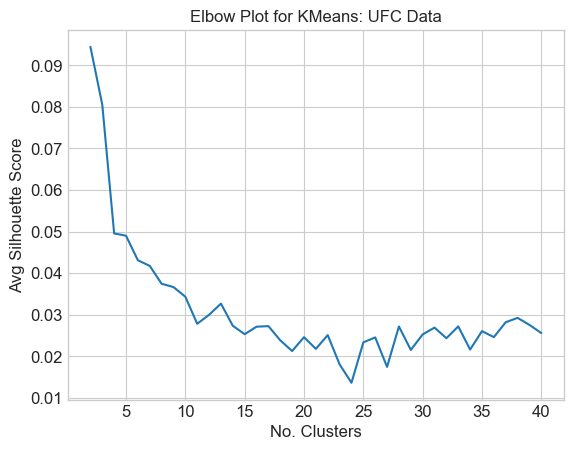

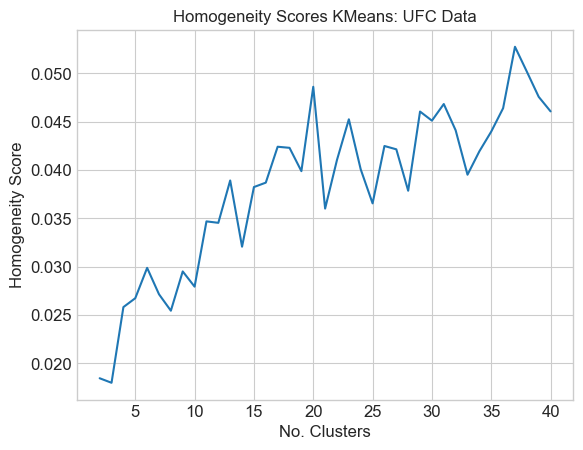

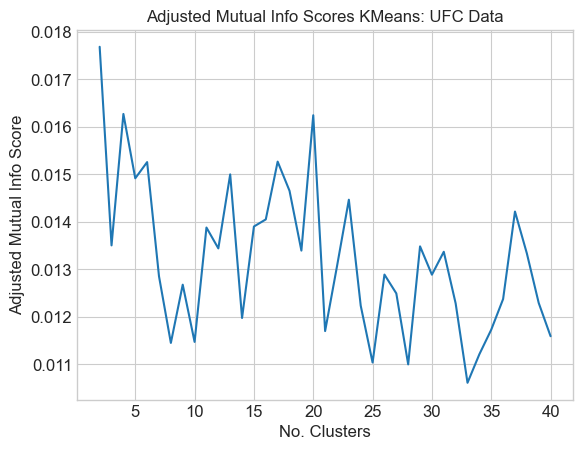

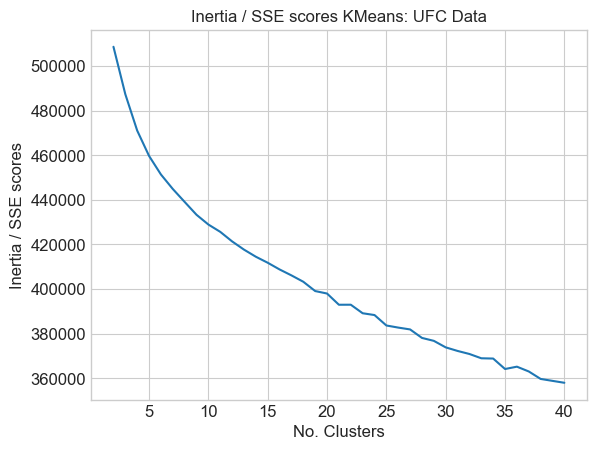

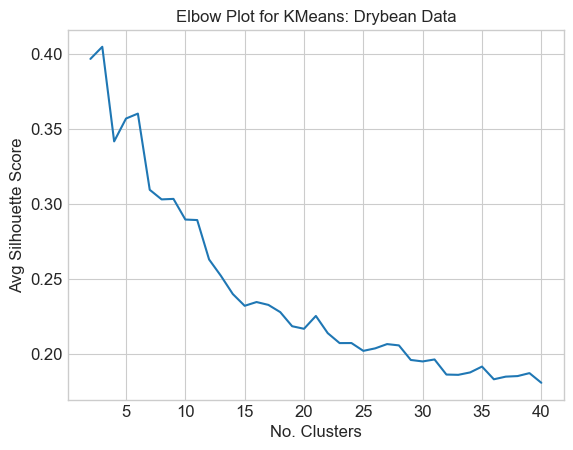

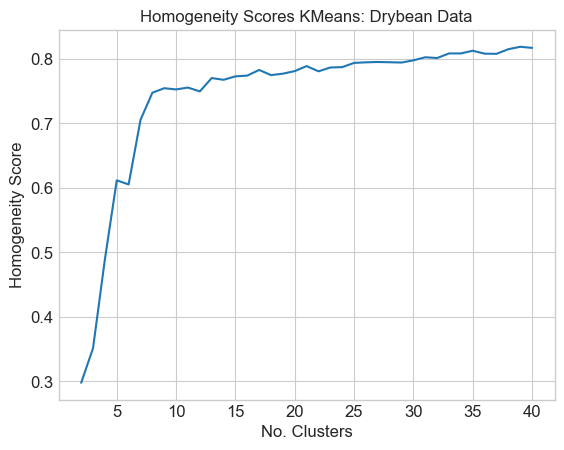

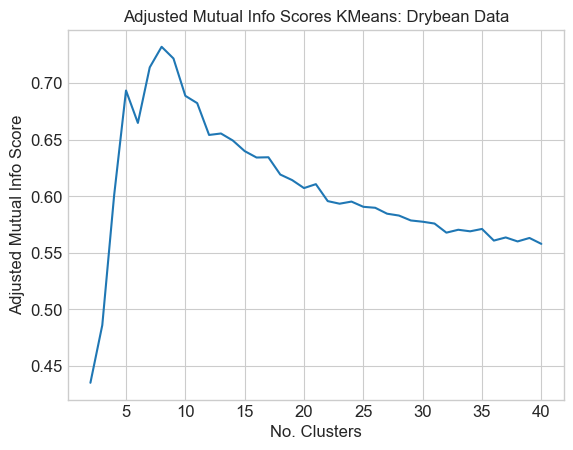

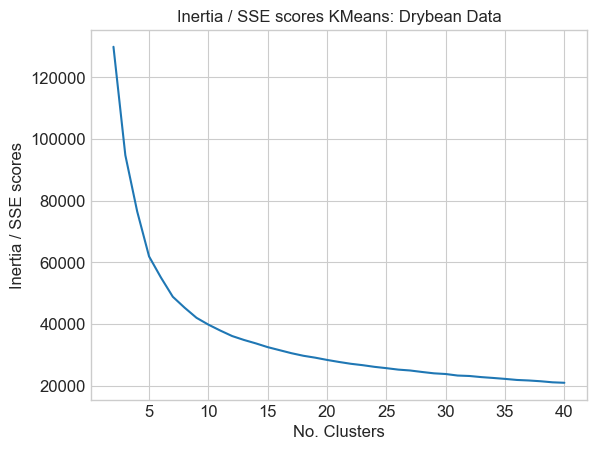

In [10]:
# ufc dataset
run_kmeans(X_ufc,y_ufc,'UFC Data')
# drybean dataset
run_kmeans(X_dry,y_dry,'Drybean Data')

In [11]:
# From the Silhouette plot, we can see k=2 is optimal for ufc dataset
km = KMeans(n_clusters=2, init='k-means++', n_init=10, random_state=100)
evaluate_kmeans(km,X_ufc,y_ufc)
df = pd.DataFrame(km.cluster_centers_)
df.to_csv("UFC kMeans Cluster Centers.csv")

Model Evaluation Metrics
*****************************************************
time	inertia	silhouette	homo	AMI
1.433s	508660	0.094	0.018	0.018
*****************************************************


In [102]:
# From the Silhouette plot, we can see k=8 is optimal for drybean dataset
km = KMeans(n_clusters=8, init='k-means++', n_init=10, random_state=100)
evaluate_kmeans(km,X_dry,y_dry)
df = pd.DataFrame(km.cluster_centers_)
df.to_csv("Drybean kMeans Cluster Centers.csv")

Model Evaluation Metrics
*****************************************************
time	inertia	silhouette	homo	AMI
4.433s	45242	0.303	0.747	0.732
*****************************************************


## Expectation Maximization

In [15]:
from sklearn.mixture import GaussianMixture as GM
from sklearn.metrics import silhouette_score, adjusted_mutual_info_score, homogeneity_score

np.random.seed(0)

def run_EM(X,y,title):

    clusters = list(np.arange(2,41,1))
    sil_scores = []; ami_scores = []; homo_scores = []; train_times = []; aic_scores = []; bic_scores = []

    for c in clusters:
        start_time = timeit.default_timer()
        em = GM(n_components=c,covariance_type='full',n_init=1,warm_start=True,random_state=100).fit(X)
        end_time = timeit.default_timer()
        train_times.append(end_time - start_time)

        labels = em.predict(X)
        sil_scores.append(silhouette_score(X, labels))
        ami_scores.append(adjusted_mutual_info_score(y, labels))
        homo_scores.append(homogeneity_score(y, labels))
        aic_scores.append(em.aic(X))
        bic_scores.append(em.bic(X))

    # elbow curve for silhouette score
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(clusters, sil_scores)
    plt.grid(True)
    plt.xlabel('No. Distributions')
    plt.ylabel('Avg Silhouette Score')
    plt.title('Elbow Plot for EM: '+ title)
    plt.show()

    # plot homogeneity scores
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(clusters, homo_scores)
    plt.grid(True)
    plt.xlabel('No. Distributions')
    plt.ylabel('Homogeneity Score')
    plt.title('Homogeneity Scores EM: '+ title)
    plt.show()

    # plot AMI scores
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(clusters, ami_scores)
    plt.grid(True)
    plt.xlabel('No. Distributions')
    plt.ylabel('Adjusted Mutual Info Score')
    plt.title('Adjusted Mutual Info Scores EM: '+ title)
    plt.show()

    # plot model AIC and BIC
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(clusters, aic_scores, label='AIC')
    ax.plot(clusters, bic_scores,label='BIC')
    plt.grid(True)
    plt.xlabel('No. Distributions')
    plt.ylabel('Model Complexity Score')
    plt.title('EM Model Complexity: '+ title)
    plt.legend(loc="best")
    plt.show()

def evaluate_EM(em, X, y):
    start_time = timeit.default_timer()
    em.fit(X, y)
    end_time = timeit.default_timer()
    training_time = end_time - start_time

    labels = em.predict(X)

    results = [training_time, silhouette_score(X, labels)]

    clustering_metrics = [
        homogeneity_score,
        adjusted_mutual_info_score,
    ]
    results += [m(y, labels) for m in clustering_metrics]

    print("Model Evaluation Metrics")
    print("*****************************************************")
    print("time\tsilhouette\thomo\tAMI")

    # Show the results
    formatter_result = (
        "{:.3f}s\t{:.3f}\t{:.3f}\t{:.3f}"
    )
    print(formatter_result.format(*results))

    print("*****************************************************")

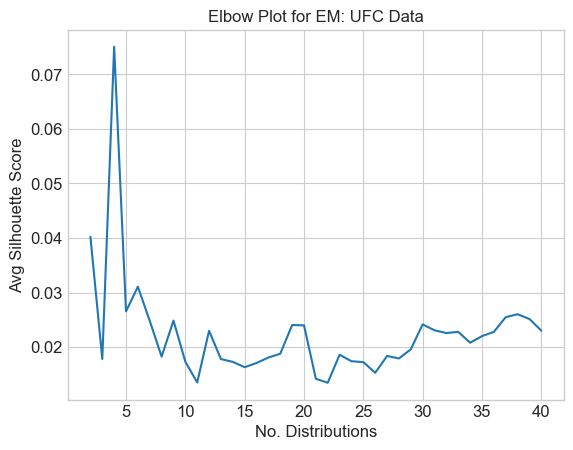

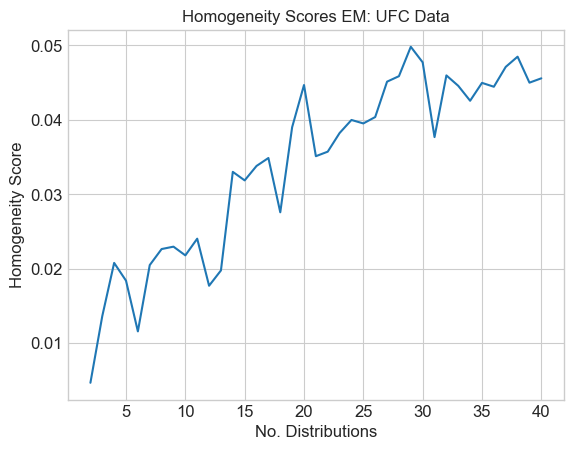

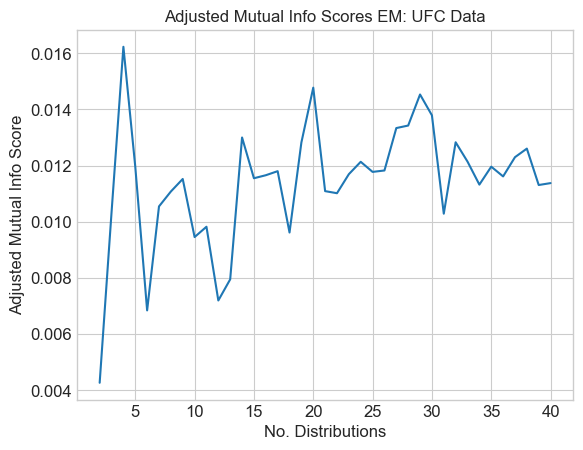

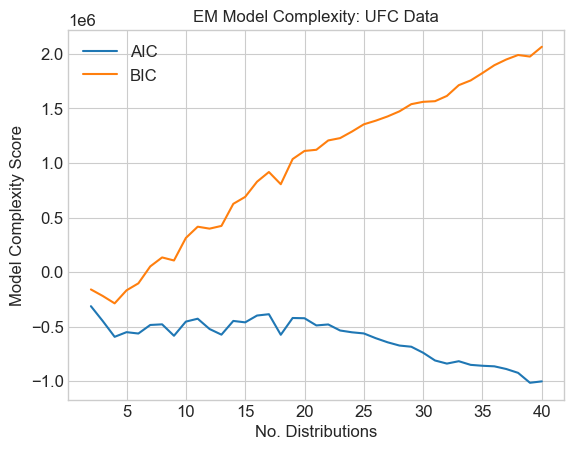

/Users/wind/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


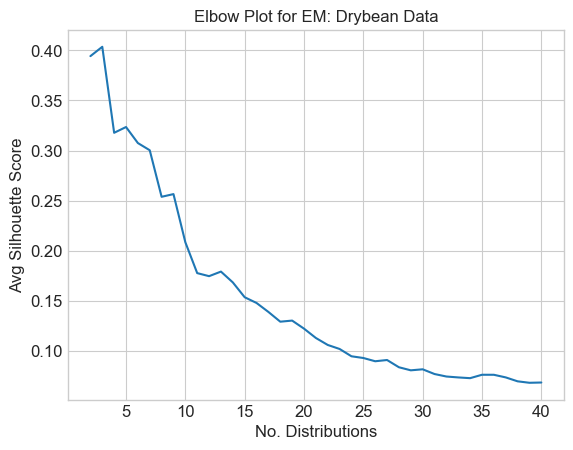

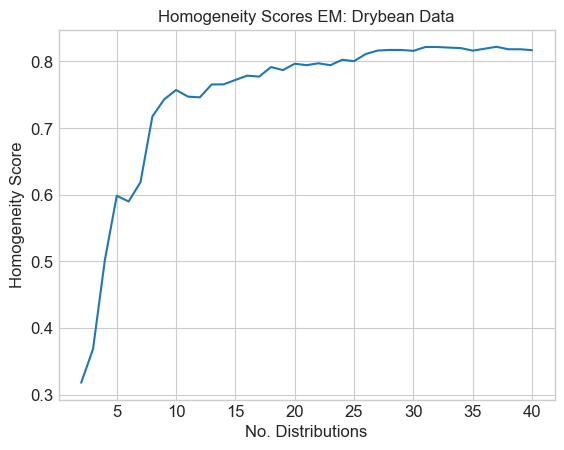

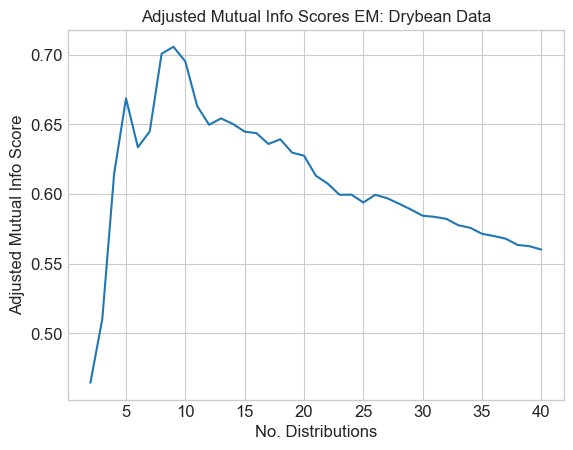

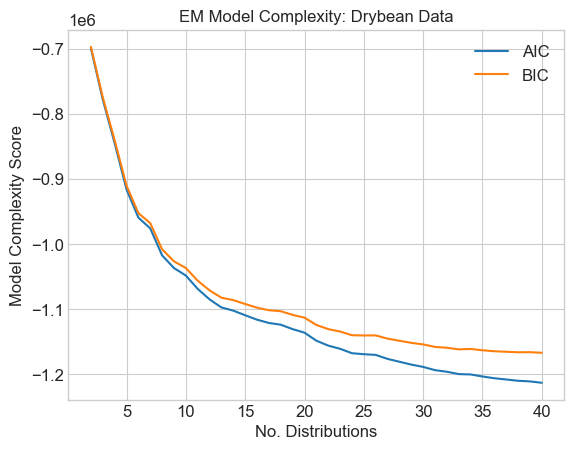

In [16]:
# ufc dataset
run_EM(X_ufc,y_ufc,'UFC Data')
# drybean dataset
run_EM(X_dry,y_dry,'Drybean Data')

In [17]:
# From the Silhouette plot, we can see k=4 is optimal for ufc dataset
em = GM(n_components=4,covariance_type='full',n_init=1,warm_start=True,random_state=100)
evaluate_EM(em,X_ufc,y_ufc)
df = pd.DataFrame(em.means_)
df.to_csv("ufc EM Component Means.csv")

Model Evaluation Metrics
*****************************************************
time	silhouette	homo	AMI
2.564s	0.075	0.021	0.016
*****************************************************


In [18]:
# From the Silhouette plot, we can see k=3 is optimal for drybean dataset
em = GM(n_components=3,covariance_type='full',n_init=1,warm_start=True,random_state=100)
evaluate_EM(em,X_dry,y_dry)
df = pd.DataFrame(em.means_)
df.to_csv("drybean EM Component Means.csv")

Model Evaluation Metrics
*****************************************************
time	silhouette	homo	AMI
0.324s	0.404	0.369	0.510
*****************************************************


# Dimensionality Reduction Algorithm
This section will implement 4 different dimensionality reduction techniques. Then, k-means and EM clustering will be performed for each (dataset * dim_reduction) combination to see how the clustering compares with using the full datasets. The 4 dimensionality reduction techniques are:
- Principal Components Analysis (PCA). Optimal number of PC chosen by inspecting % variance explained and the eigenvalues.
- Independent Components Analysis (ICA). Optimal number of IC chosen by inspecting kurtosis.
- Random Components Analysis (RCA) (otherwise known as Randomized Projections). Optimal number of RC chosen by inspecting reconstruction error.
- L<sub>1</sub>-based feature selection. Optimal number of components chosen by feature importance.L<sub>1</sub> regularization uses a penalty term to cause the coefficient of the irrelevant feature to 0, thus using this method can select the relevant features.

In [56]:
from sklearn.decomposition import PCA, FastICA as ICA
from sklearn.random_projection import GaussianRandomProjection as GRP
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from itertools import product
from collections import defaultdict

def run_PCA(X,title):

    pca = PCA(random_state=5).fit(X) #for all components
    cum_var = np.cumsum(pca.explained_variance_ratio_)

    fig, ax1 = plt.subplots()
    ax1.plot(list(range(len(pca.explained_variance_ratio_))), cum_var, 'b-')
    ax1.axhline(y=0.95, color='r', linestyle='-')
    ax1.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=10)
    ax1.set_xlabel('Principal Components')
    # Make the y-axis label, ticks and tick labels match the line color.
    ax1.set_ylabel('Cumulative Explained Variance Ratio', color='b')
    ax1.tick_params('y', colors='b')
    plt.grid(False)

    ax2 = ax1.twinx()
    ax2.plot(list(range(len(pca.singular_values_))), pca.singular_values_, 'm-')
    ax2.set_ylabel('Eigenvalues', color='m')
    ax2.tick_params('y', colors='m')
    plt.grid(False)

    plt.title("PCA Explained Variance and Eigenvalues: "+ title)
    fig.tight_layout()
    plt.show()

def run_ICA(X,title):

    dims = list(np.arange(2,(X.shape[1]-1),2))
    dims.append(X.shape[1])
    ica = ICA(random_state=5, max_iter=1000)
    kurt = []

    for dim in dims:
        ica.set_params(n_components=dim)
        tmp = ica.fit_transform(X)
        tmp = pd.DataFrame(tmp)
        tmp = tmp.kurt(axis=0)
        kurt.append(tmp.abs().mean())

    plt.figure()
    plt.title("ICA Kurtosis: "+ title)
    plt.xlabel("Independent Components")
    plt.ylabel("Avg Kurtosis Across IC")
    plt.plot(dims, kurt, 'b-')
    plt.grid(False)
    plt.show()

def run_RCA(X,title):

    dims = list(range(2,(X.shape[1]-1),2))
    dims.append(X.shape[1])
    tmp = defaultdict(dict)

    for i,dim in product(range(5),dims):
        grp = GRP(random_state=i, n_components=dim)
        tmp[dim][i] = pairwiseDistCorr(grp.fit_transform(X), X)
    tmp = pd.DataFrame(tmp).T
    mean_recon = tmp.mean(axis=1).tolist()
    std_recon = tmp.std(axis=1).tolist()


    fig, ax1 = plt.subplots()
    ax1.plot(dims,mean_recon, 'b-')
    ax1.axhline(y=0.95, color='r', linestyle='-')
    ax1.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=10)
    ax1.set_xlabel('Random Components')
    # Make the y-axis label, ticks and tick labels match the line color.
    ax1.set_ylabel('Mean Reconstruction Correlation', color='b')
    ax1.tick_params('y', colors='b')
    plt.grid(False)

    ax2 = ax1.twinx()
    ax2.plot(dims,std_recon, 'm-')
    ax2.set_ylabel('STD Reconstruction Correlation', color='m')
    ax2.tick_params('y', colors='m')
    plt.grid(False)

    plt.title("Random Components for 5 Restarts: "+ title)
    fig.tight_layout()
    plt.show()

def l1(X, y):
    lasso = LassoCV(max_iter=10000).fit(X,y)
    model = SelectFromModel(lasso)
    X_new = model.transform(X)
    print('reconstructed dataset has shape of', X_new.shape)
    return model, X_new

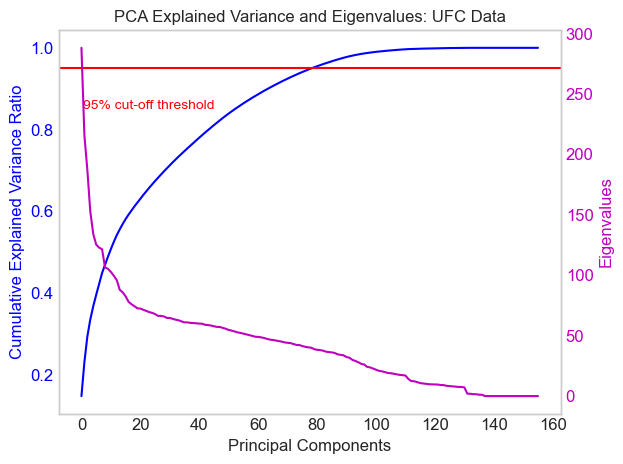

/Users/wind/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(
/Users/wind/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(
/Users/wind/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(
/Users/wind/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(
/Users/wind/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by defaul

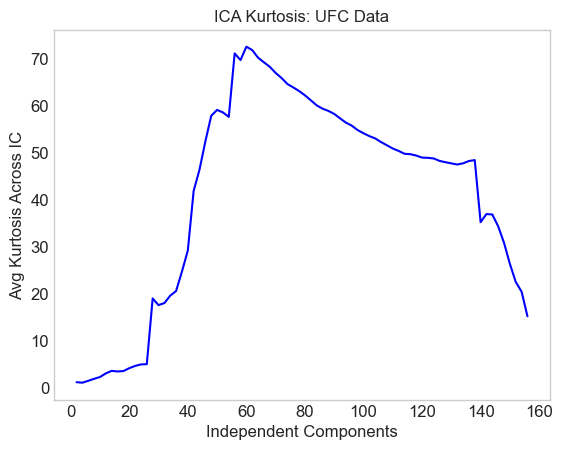

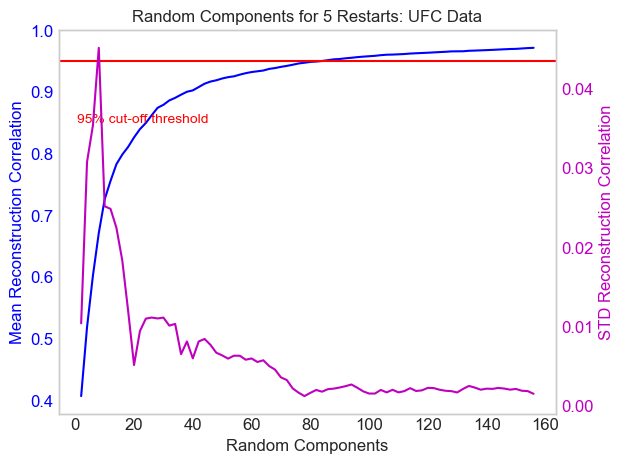

In [57]:
# ufc data
run_PCA(X_ufc,"UFC Data")
run_ICA(X_ufc,"UFC Data")
run_RCA(X_ufc,"UFC Data")

In [58]:
ufcX = df_ufc.drop("Winner", 1).copy().values
ufcY = df_ufc["Winner"].copy().values
_, X_ufc_new = l1(ufcX,ufcY)

/var/folders/yq/rrz1xzpj60j7kl2lvygmc3800000gn/T/ipykernel_26907/2284995879.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ufcX = df_ufc.drop("Winner", 1).copy().values


reconstructed dataset has shape of (3592, 54)


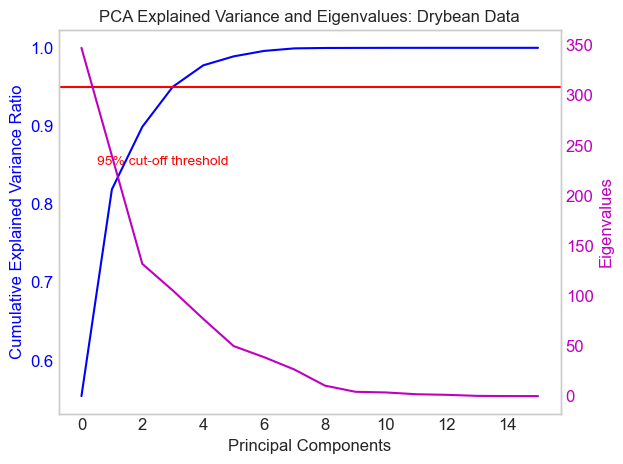

/Users/wind/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(
/Users/wind/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/Users/wind/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(
/Users/wind/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(
/Users/wind/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge

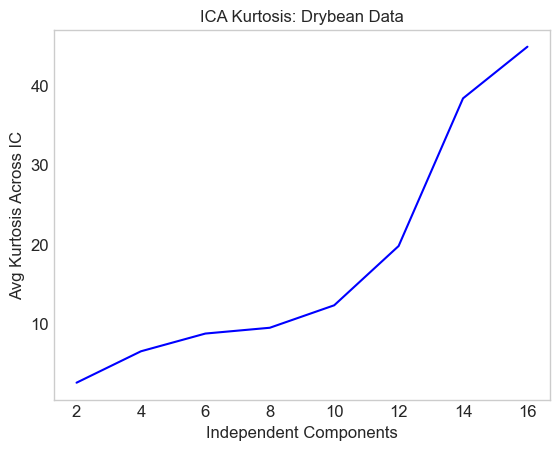

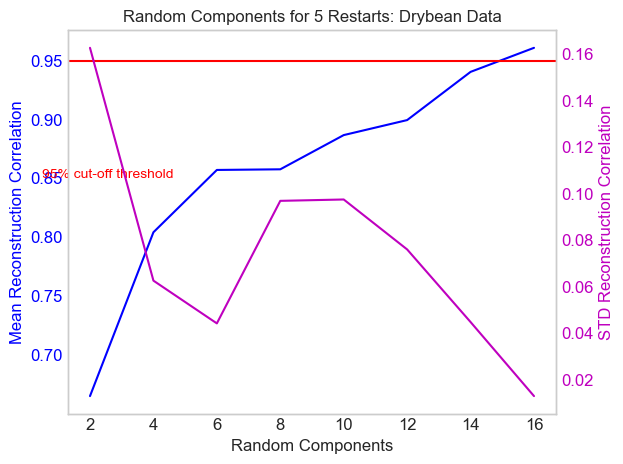

In [59]:
# drybean data
run_PCA(X_dry,"Drybean Data")
run_ICA(X_dry,"Drybean Data")
run_RCA(X_dry,"Drybean Data")


## Clustering Algorithm applied on feature reduced dataset


In [60]:
dryX = df_bean.drop("Class", 1).copy().values
dryY = df_bean["Class"].copy().values
_, X_dry_new = l1(dryX,dryY)

/var/folders/yq/rrz1xzpj60j7kl2lvygmc3800000gn/T/ipykernel_26907/117596195.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dryX = df_bean.drop("Class", 1).copy().values
/Users/wind/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31.449162668024655, tolerance: 3.2439648787656603
  model = cd_fast.enet_coordinate_descent_gram(
/Users/wind/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47.42625506708646, tolerance: 3.2439648787656603
  model = cd_fast.enet_coordinate_descent_gram(
/Users/wind/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear

reconstructed dataset has shape of (13611, 1)


ufc dataset

In [61]:
pca_ufc = PCA(n_components=80,random_state=5).fit_transform(X_ufc)
ica_ufc = ICA(n_components=64,random_state=5).fit_transform(X_ufc)
rca_ufc = GRP(n_components=86,random_state=5).fit_transform(X_ufc)
_, lasso_ufc = l1(ufcX,ufcY)

/Users/wind/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


reconstructed dataset has shape of (3592, 54)


drybean dataset

In [62]:
pca_dry = PCA(n_components=3,random_state=5).fit_transform(X_dry)
ica_dry = ICA(n_components=16,random_state=5).fit_transform(X_dry)
rca_dry = GRP(n_components=15,random_state=5).fit_transform(X_dry)
_, lasso_dry = l1(dryX,dryY)

/Users/wind/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(
/Users/wind/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/Users/wind/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31.449162668024655, tolerance: 3.2439648787656603
  model = cd_fast.enet_coordinate_descent_gram(
/Users/wind/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap:

reconstructed dataset has shape of (13611, 1)


Repeat Kmeans and EM on ufc dataset

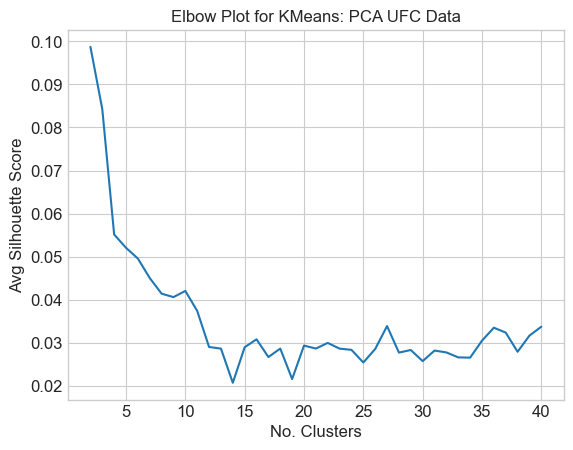

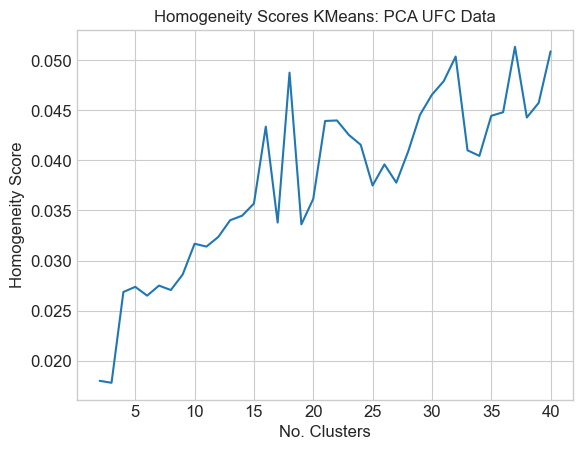

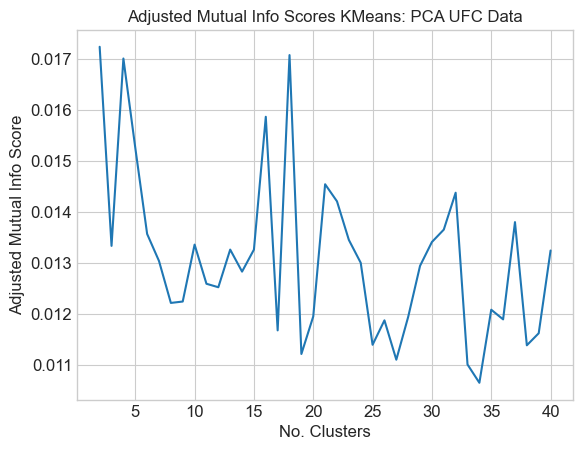

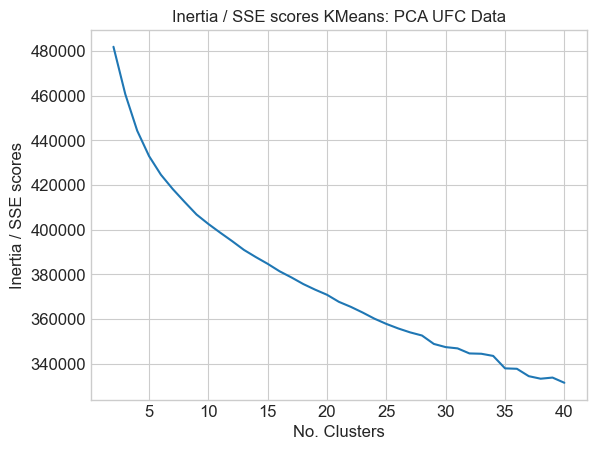

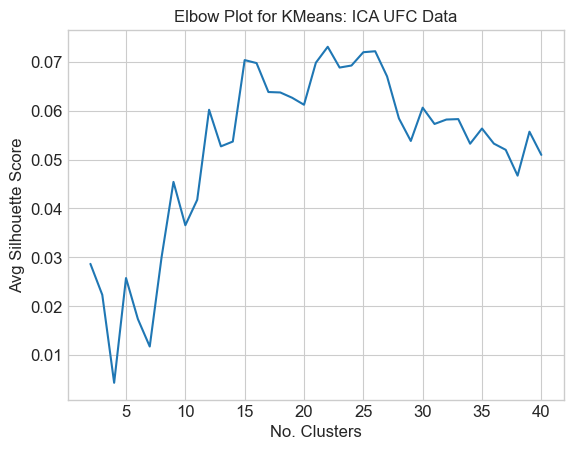

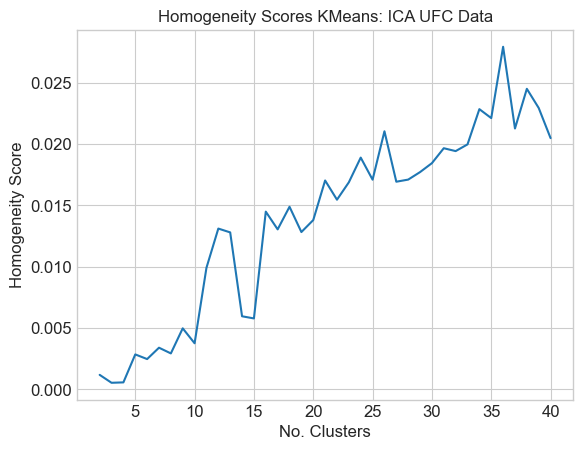

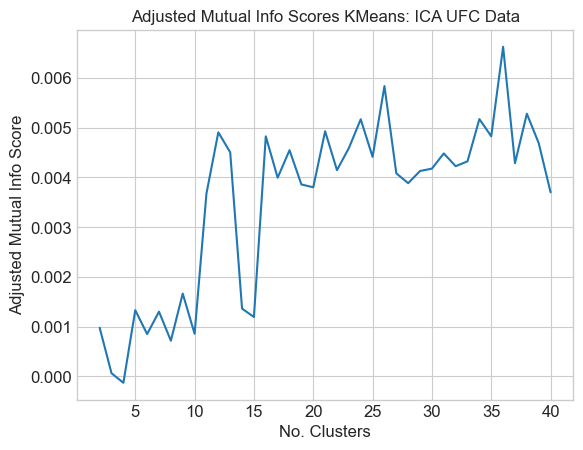

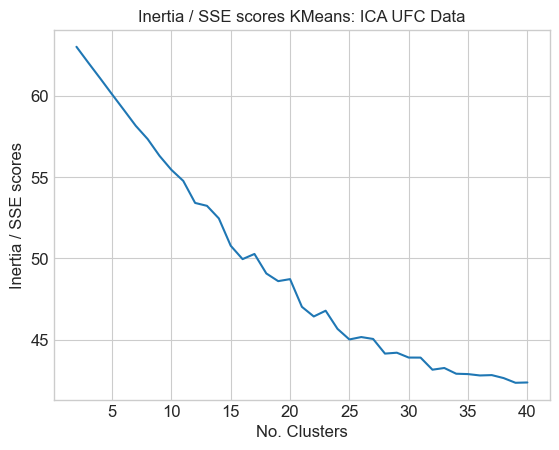

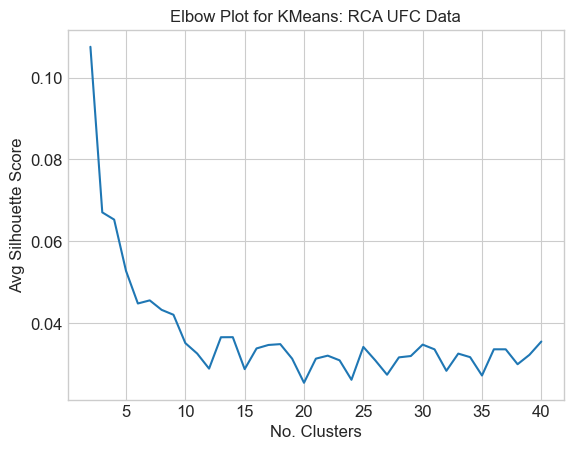

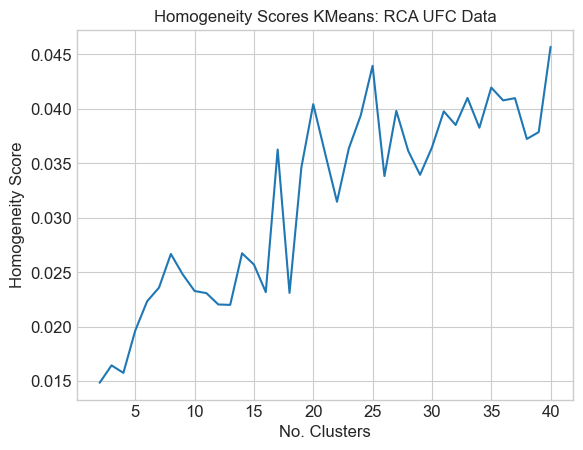

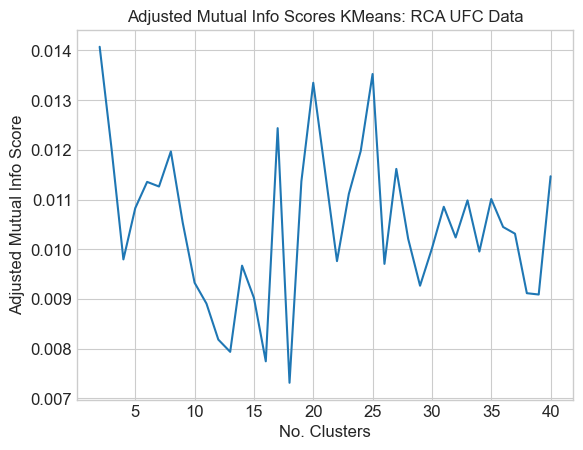

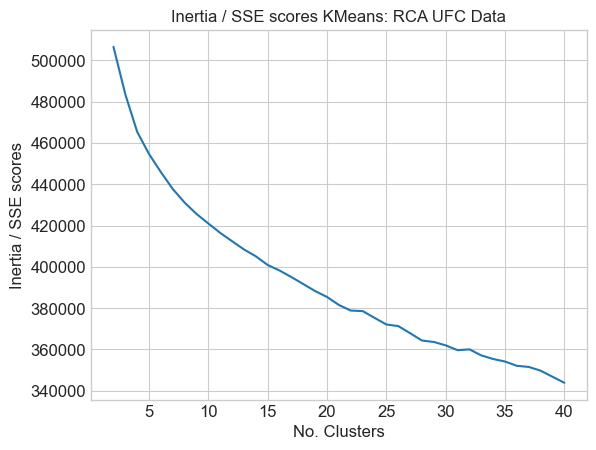

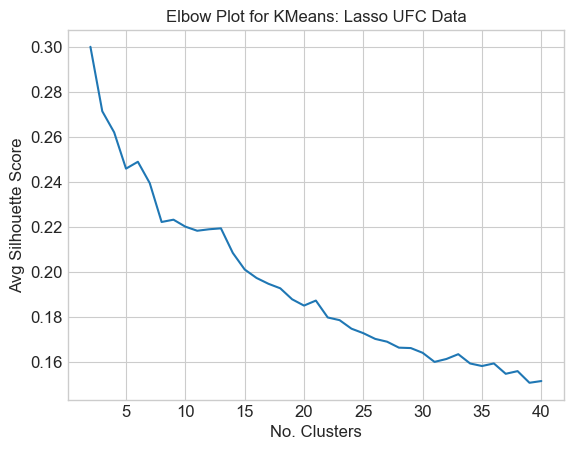

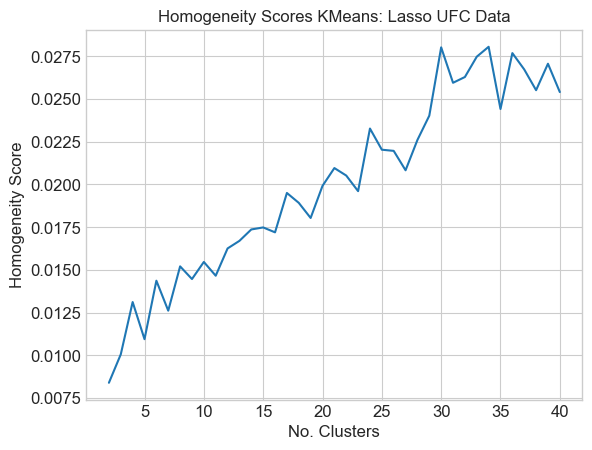

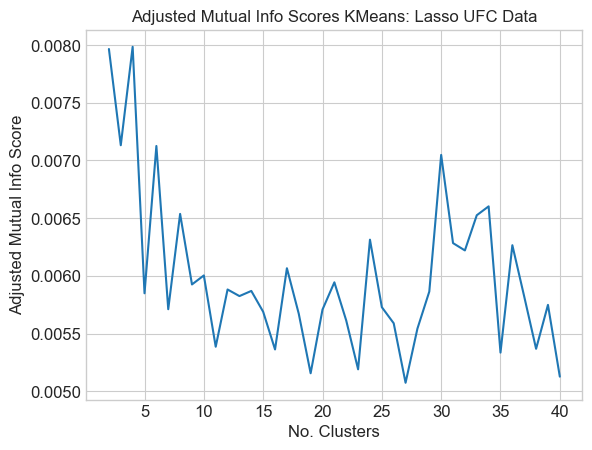

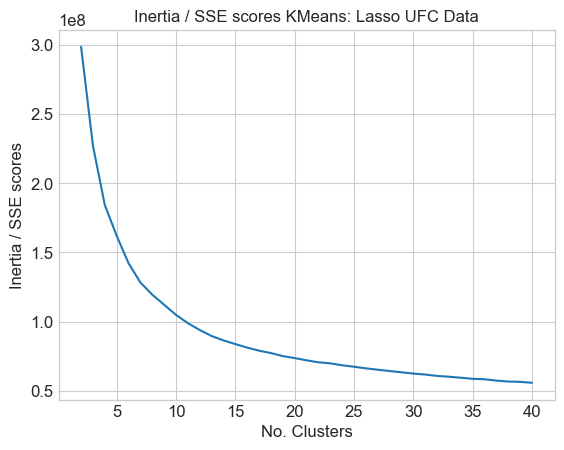

In [63]:
run_kmeans(pca_ufc,y_ufc,'PCA UFC Data')
run_kmeans(ica_ufc,y_ufc,'ICA UFC Data')
run_kmeans(rca_ufc,y_ufc,'RCA UFC Data')
run_kmeans(lasso_ufc,y_ufc,'Lasso UFC Data')

In [64]:
evaluate_kmeans(KMeans(n_clusters=2, init='k-means++', n_init=10, random_state=100),pca_ufc,y_ufc)
evaluate_kmeans(KMeans(n_clusters=23, init='k-means++', n_init=10, random_state=100),ica_ufc,y_ufc)
evaluate_kmeans(KMeans(n_clusters=2, init='k-means++', n_init=10, random_state=100),rca_ufc,y_ufc)
evaluate_kmeans(KMeans(n_clusters=2, init='k-means++', n_init=10, random_state=100),lasso_ufc,y_ufc)

Model Evaluation Metrics
*****************************************************
time	inertia	silhouette	homo	AMI
1.879s	481871	0.099	0.018	0.017
*****************************************************
Model Evaluation Metrics
*****************************************************
time	inertia	silhouette	homo	AMI
1.575s	47	0.069	0.017	0.005
*****************************************************
Model Evaluation Metrics
*****************************************************
time	inertia	silhouette	homo	AMI
0.612s	506523	0.108	0.015	0.014
*****************************************************
Model Evaluation Metrics
*****************************************************
time	inertia	silhouette	homo	AMI
0.811s	298602827	0.300	0.008	0.008
*****************************************************


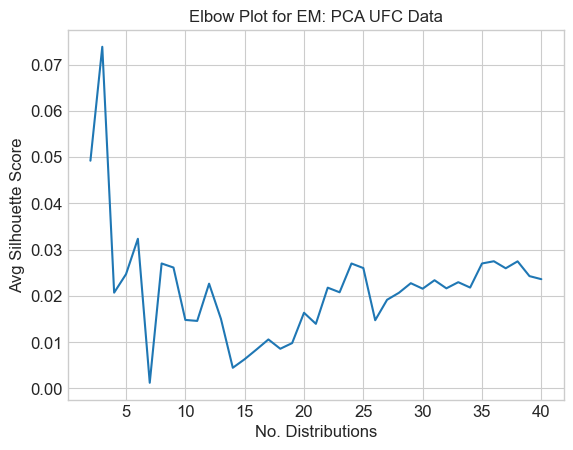

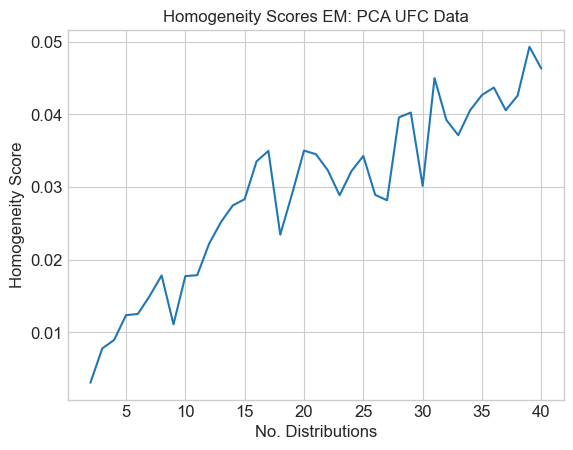

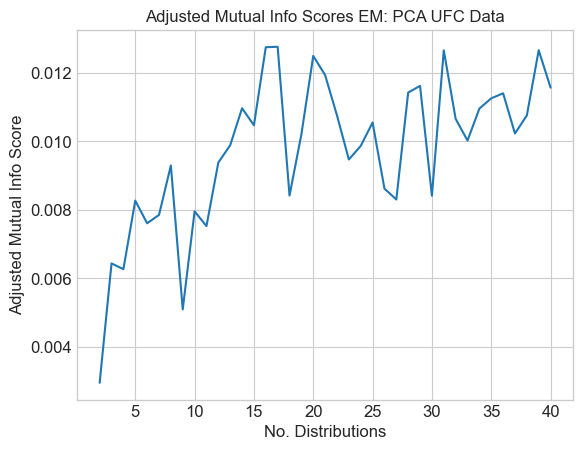

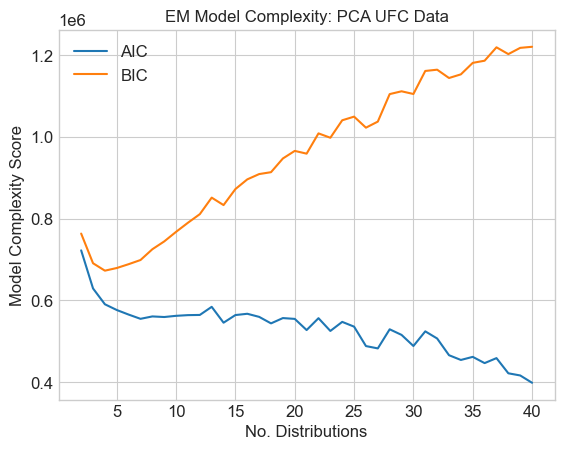

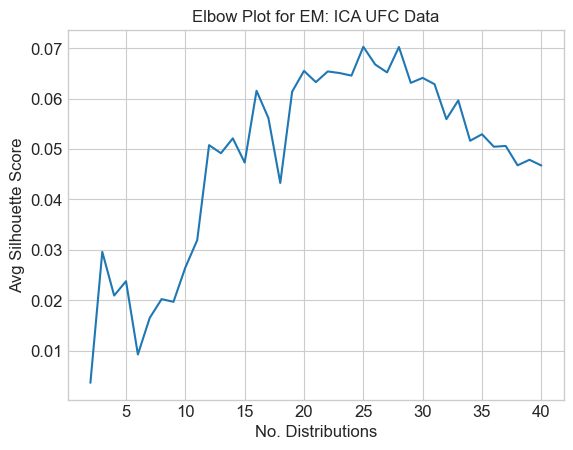

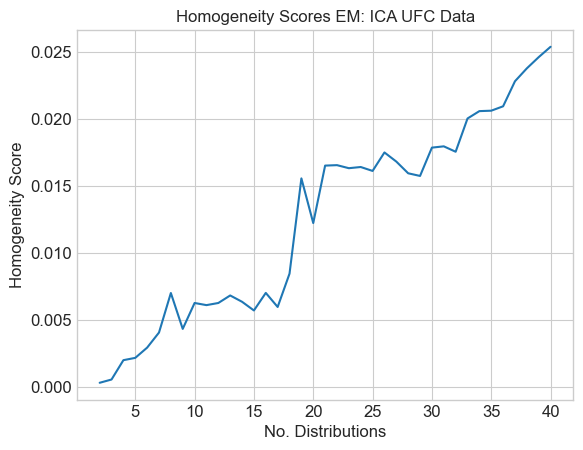

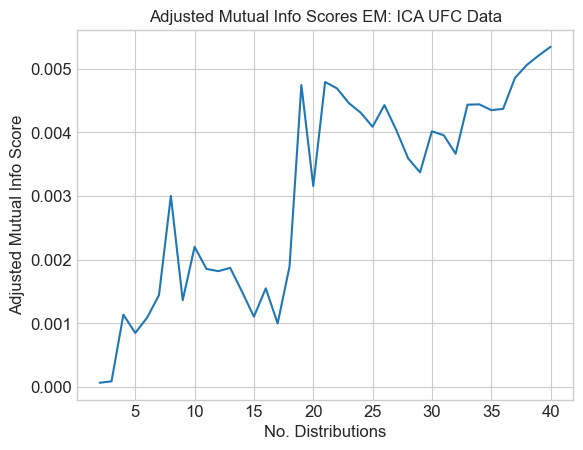

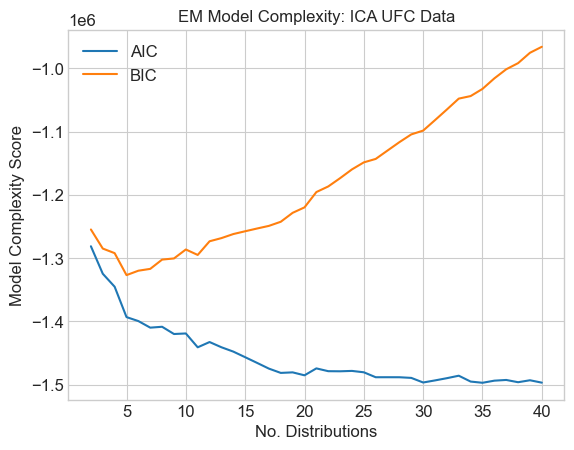

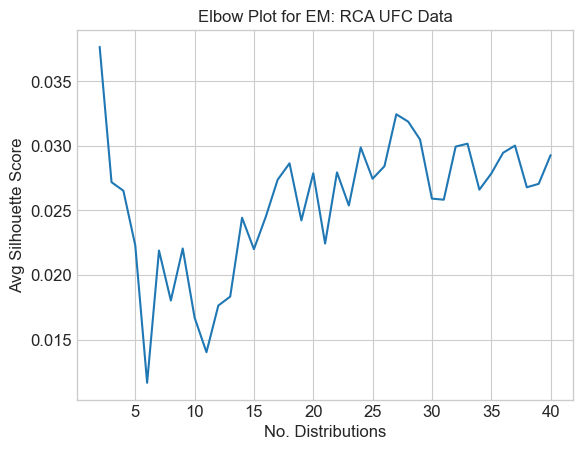

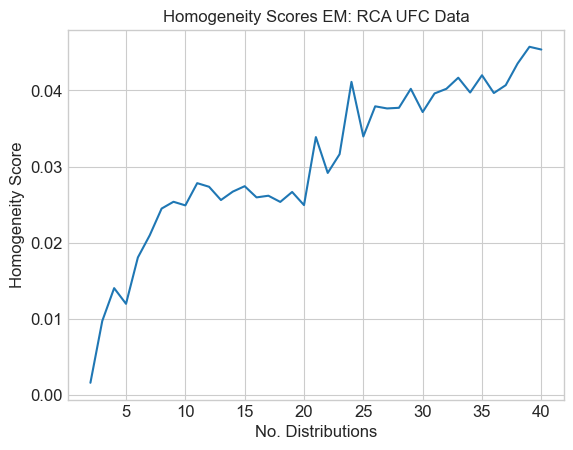

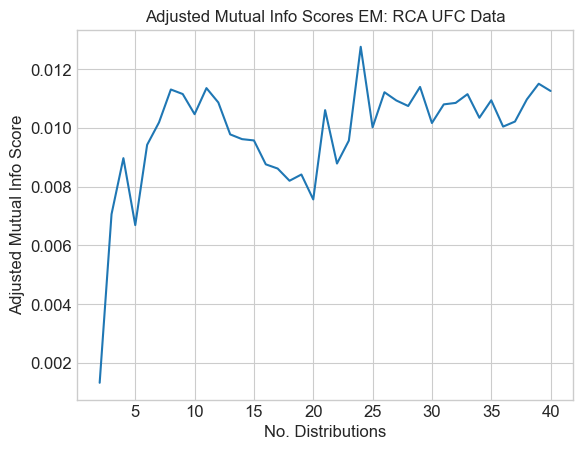

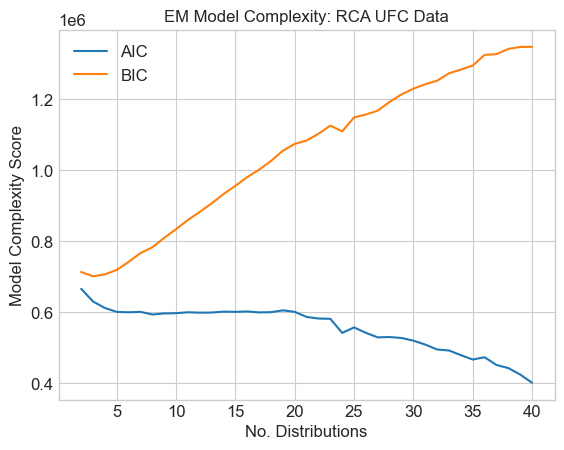

/Users/wind/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/Users/wind/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


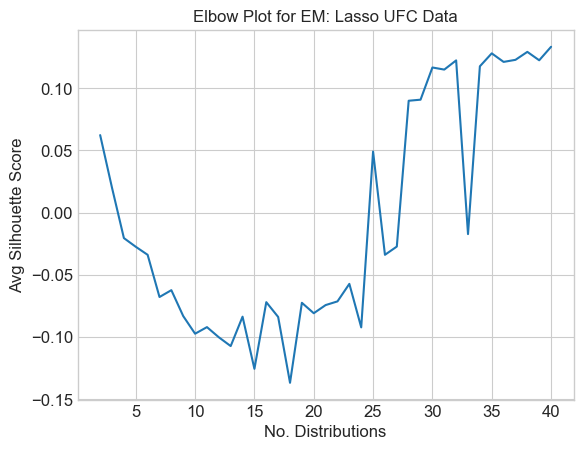

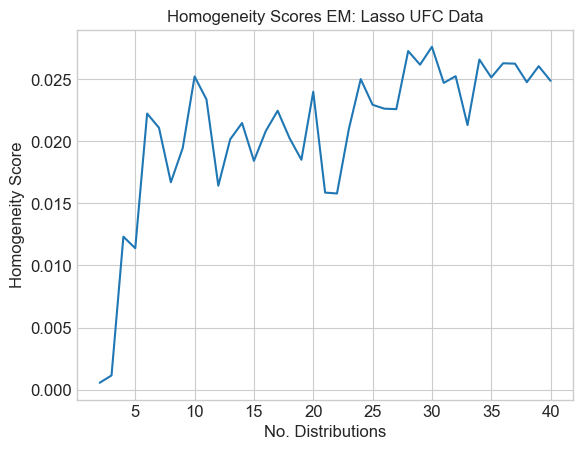

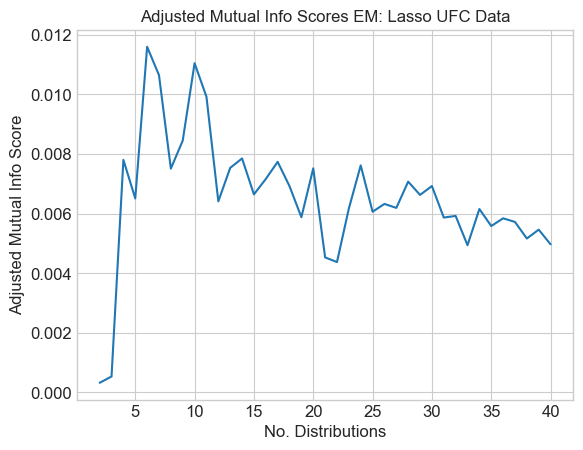

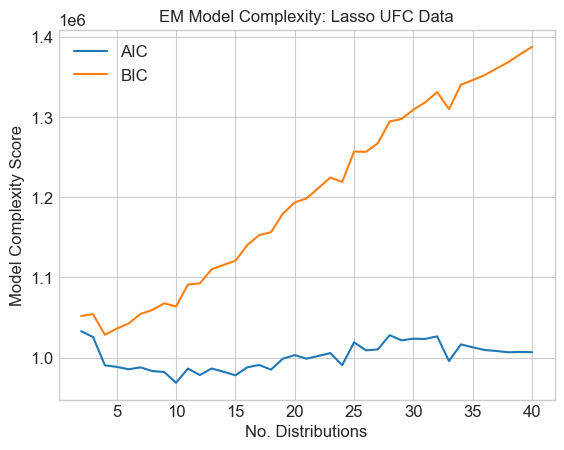

In [79]:
run_EM(pca_ufc,y_ufc,'PCA UFC Data')
run_EM(ica_ufc,y_ufc,'ICA UFC Data')
run_EM(rca_ufc,y_ufc,'RCA UFC Data')
run_EM(lasso_ufc,y_ufc,'Lasso UFC Data')

In [81]:
evaluate_EM(GM(n_components=3,covariance_type='full',n_init=1,warm_start=True,random_state=100),pca_ufc,y_ufc)
evaluate_EM(GM(n_components=25,covariance_type='full',n_init=1,warm_start=True,random_state=100),ica_ufc,y_ufc)
evaluate_EM(GM(n_components=2,covariance_type='full',n_init=1,warm_start=True,random_state=100),rca_ufc,y_ufc)
evaluate_EM(GM(n_components=40,covariance_type='full',n_init=1,warm_start=True,random_state=100),lasso_ufc,y_ufc)

Model Evaluation Metrics
*****************************************************
time	silhouette	homo	AMI
1.952s	0.074	0.008	0.006
*****************************************************
Model Evaluation Metrics
*****************************************************
time	silhouette	homo	AMI
1.740s	0.070	0.016	0.004
*****************************************************
Model Evaluation Metrics
*****************************************************
time	silhouette	homo	AMI
0.493s	0.038	0.002	0.001
*****************************************************
Model Evaluation Metrics
*****************************************************
time	silhouette	homo	AMI
5.111s	0.133	0.025	0.005
*****************************************************


Repeat Kmeans and EM on drybean data

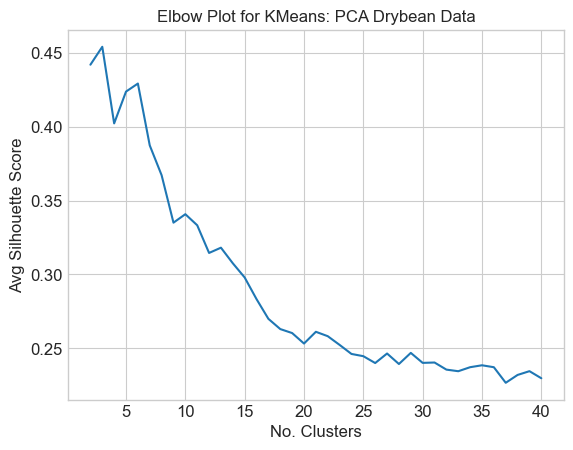

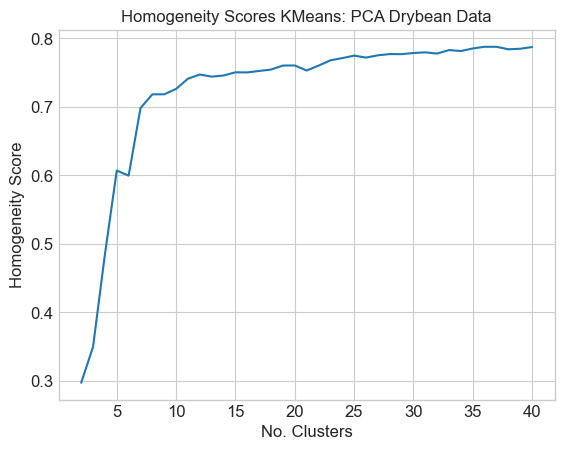

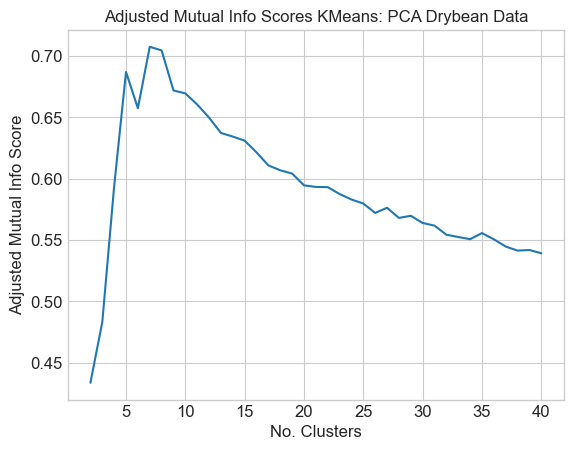

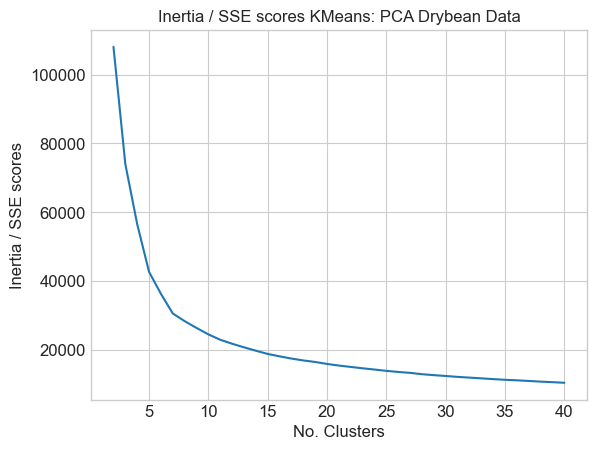

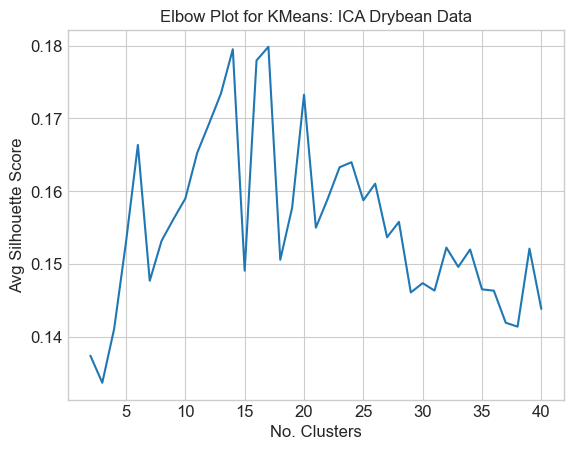

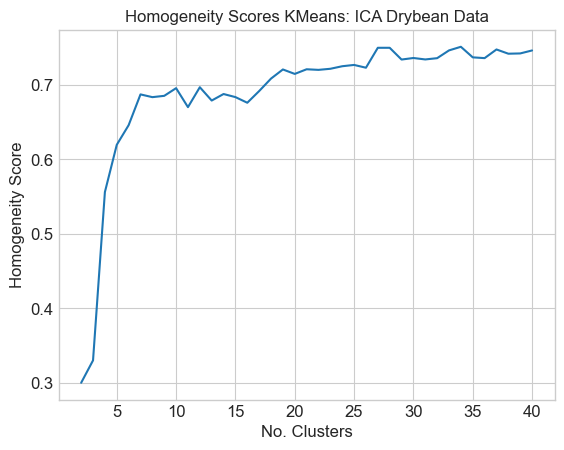

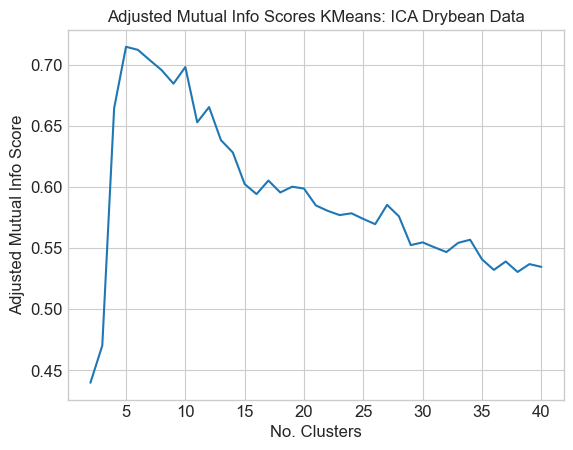

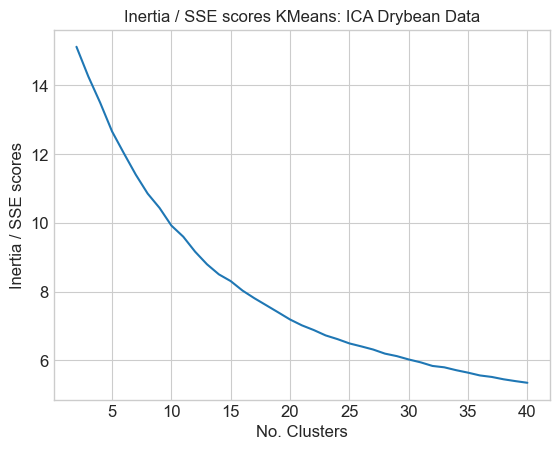

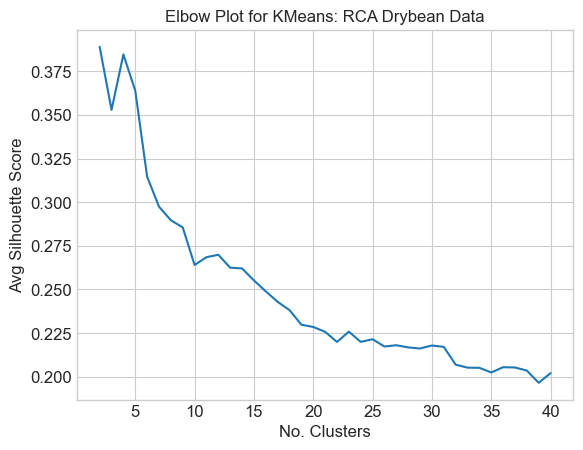

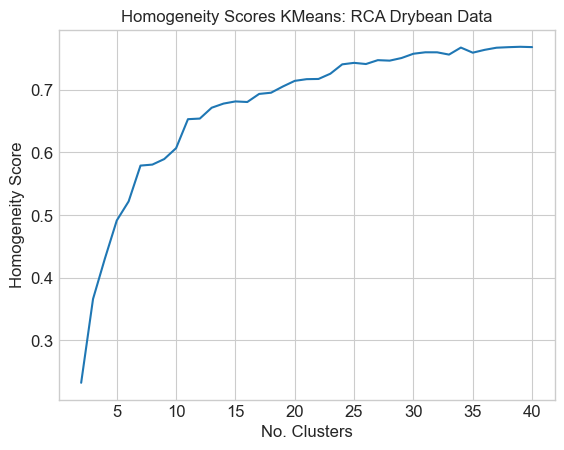

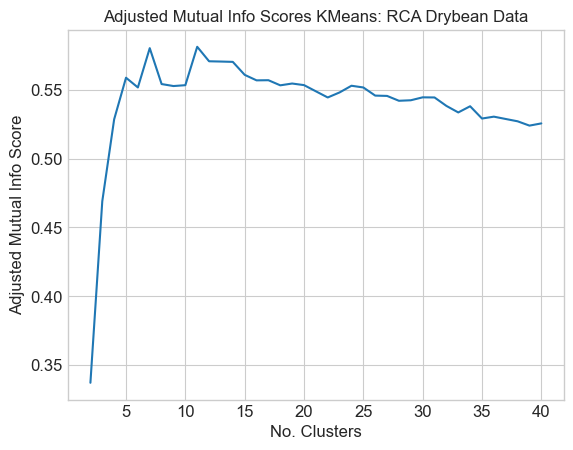

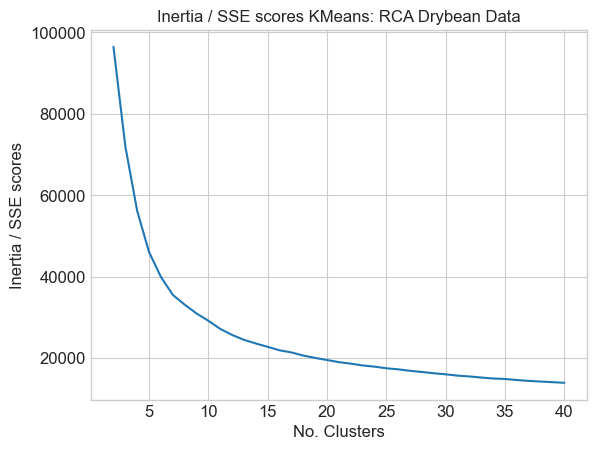

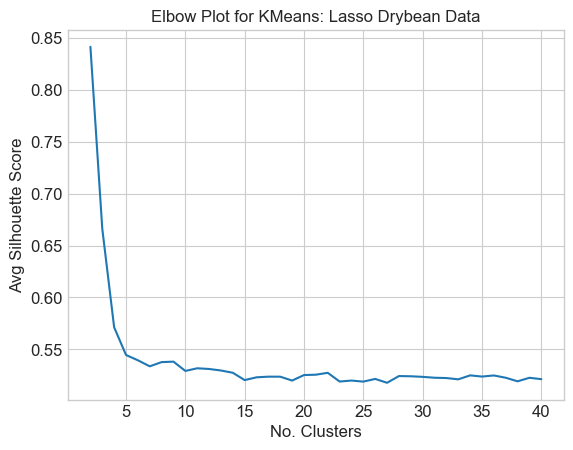

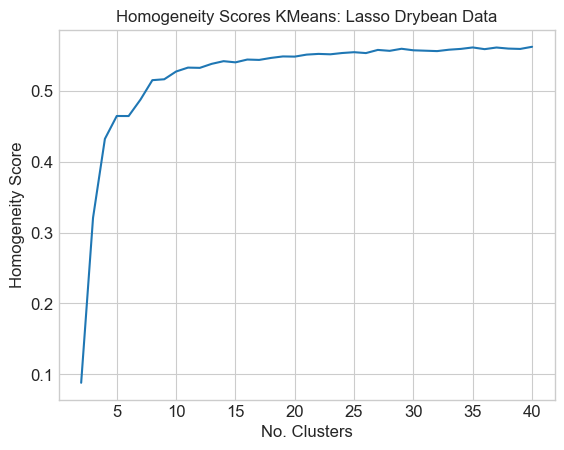

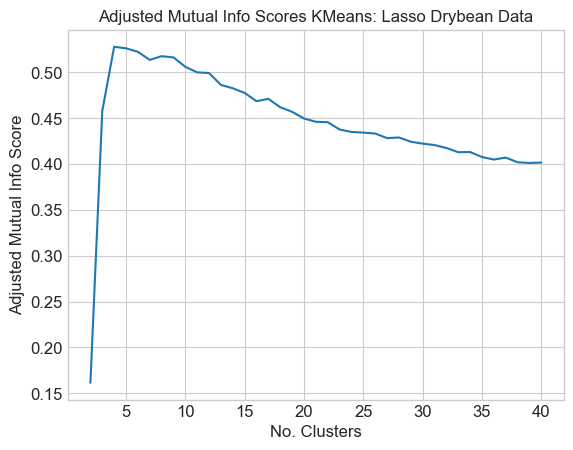

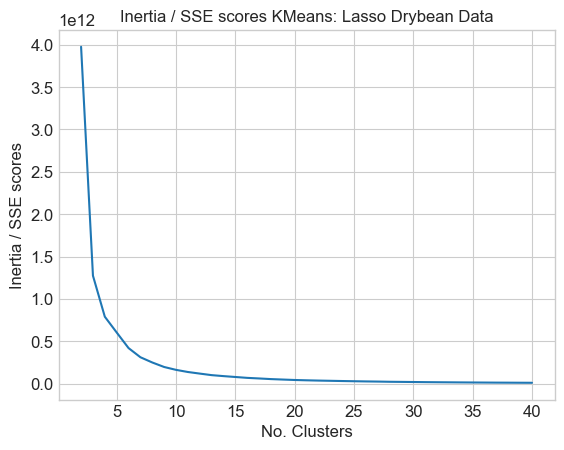

In [66]:
run_kmeans(pca_dry,y_dry,'PCA Drybean Data')
run_kmeans(ica_dry,y_dry,'ICA Drybean Data')
run_kmeans(rca_dry,y_dry,'RCA Drybean Data')
run_kmeans(lasso_dry,y_dry,'Lasso Drybean Data')

In [67]:
evaluate_kmeans(KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=100),pca_dry,y_dry)
evaluate_kmeans(KMeans(n_clusters=17, init='k-means++', n_init=10, random_state=100),ica_dry,y_dry)
evaluate_kmeans(KMeans(n_clusters=2, init='k-means++', n_init=10, random_state=100),rca_dry,y_dry)
evaluate_kmeans(KMeans(n_clusters=2, init='k-means++', n_init=10, random_state=100),lasso_dry,y_dry)

Model Evaluation Metrics
*****************************************************
time	inertia	silhouette	homo	AMI
2.510s	74004	0.454	0.349	0.483
*****************************************************
Model Evaluation Metrics
*****************************************************
time	inertia	silhouette	homo	AMI
3.275s	8	0.180	0.691	0.605
*****************************************************
Model Evaluation Metrics
*****************************************************
time	inertia	silhouette	homo	AMI
0.398s	96470	0.389	0.232	0.337
*****************************************************
Model Evaluation Metrics
*****************************************************
time	inertia	silhouette	homo	AMI
0.061s	3975383503892	0.841	0.088	0.161
*****************************************************


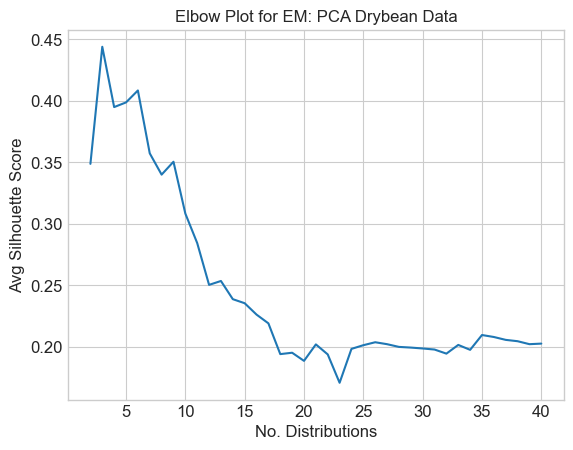

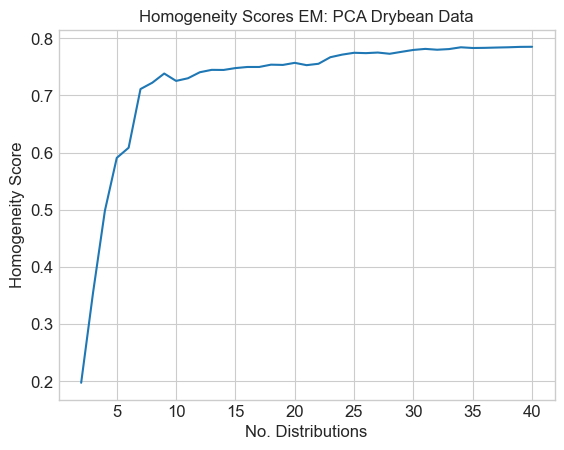

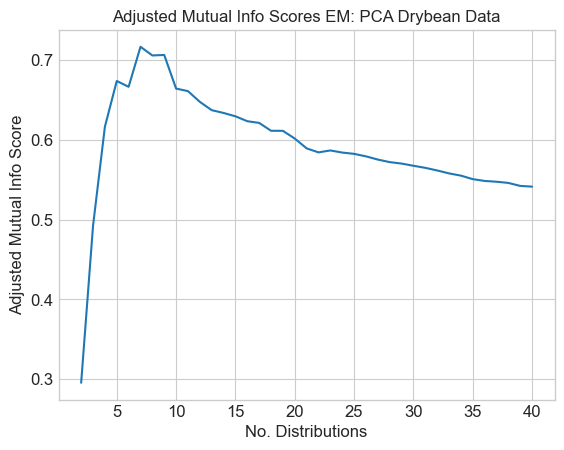

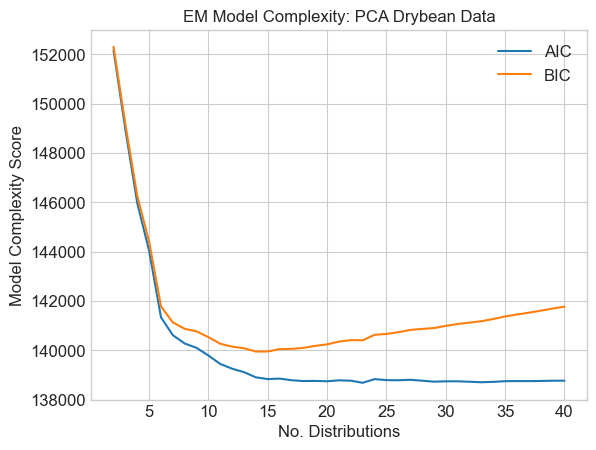

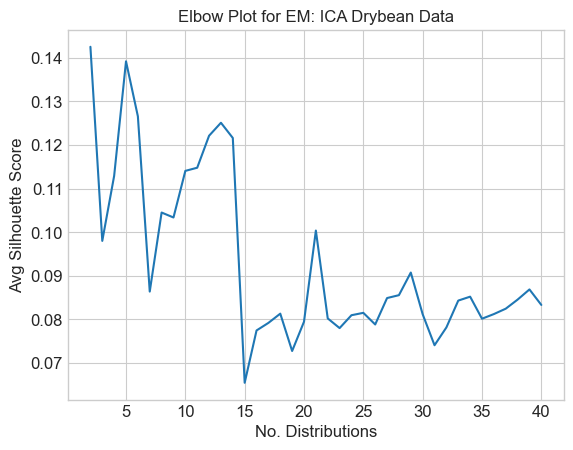

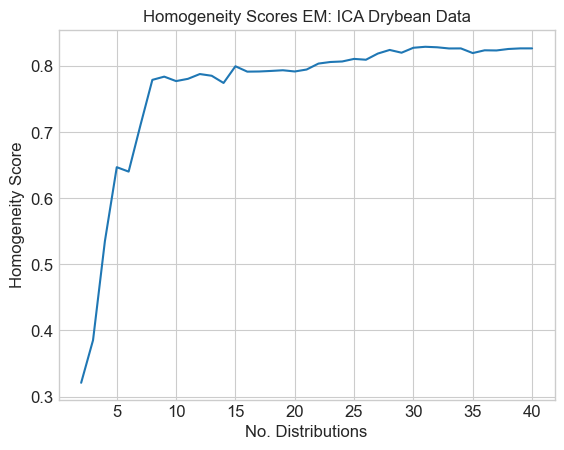

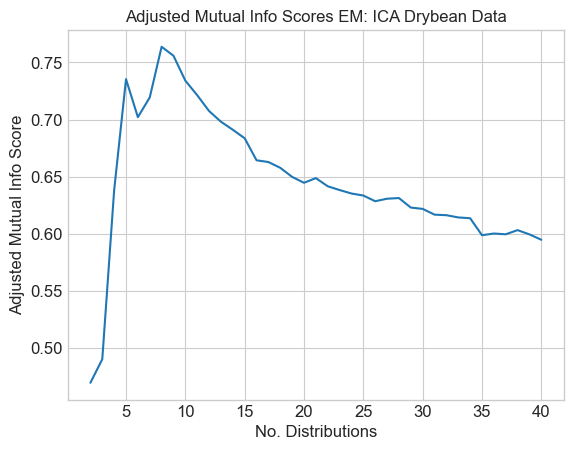

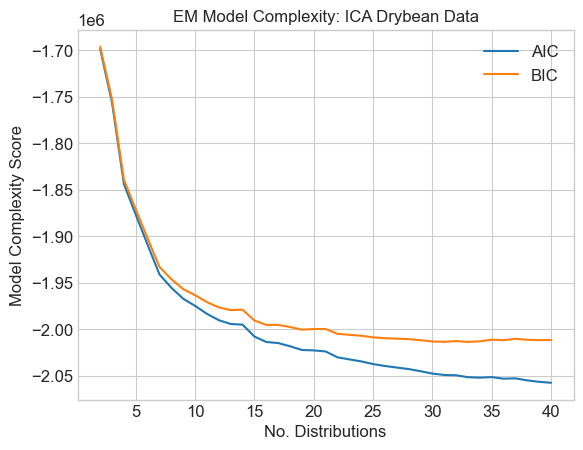

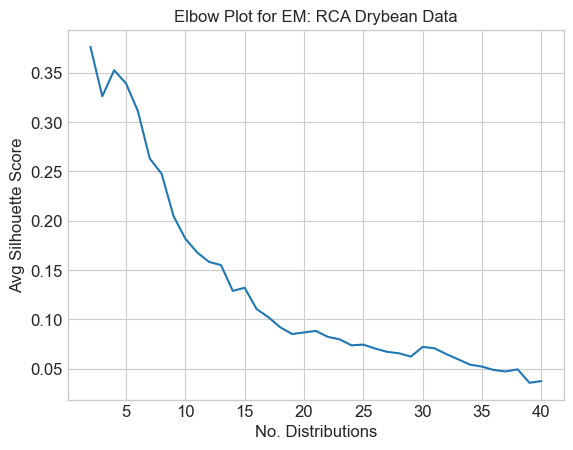

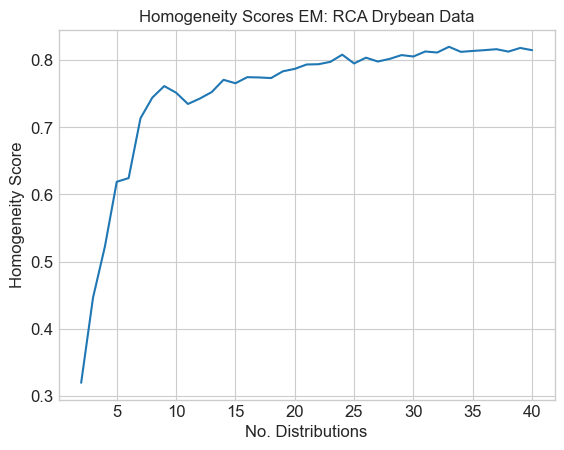

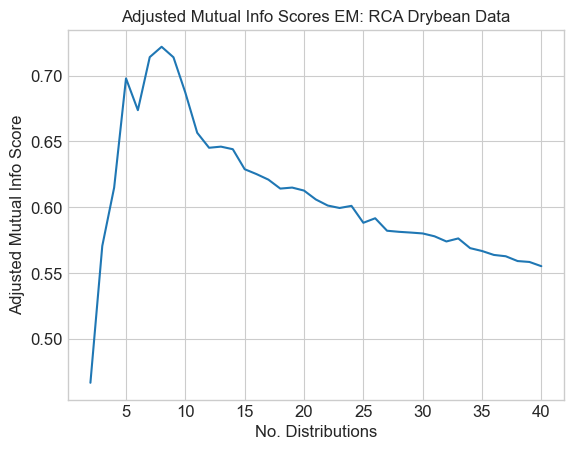

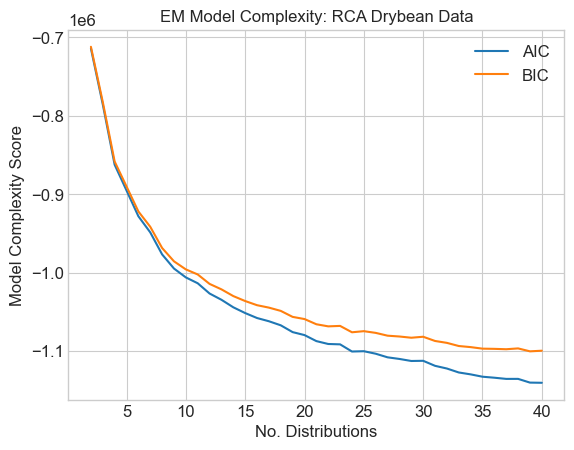

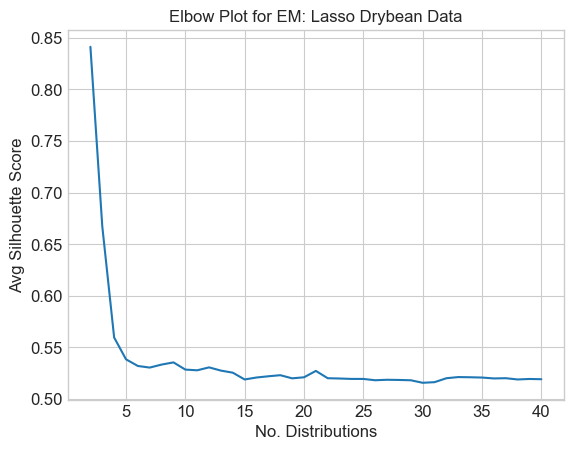

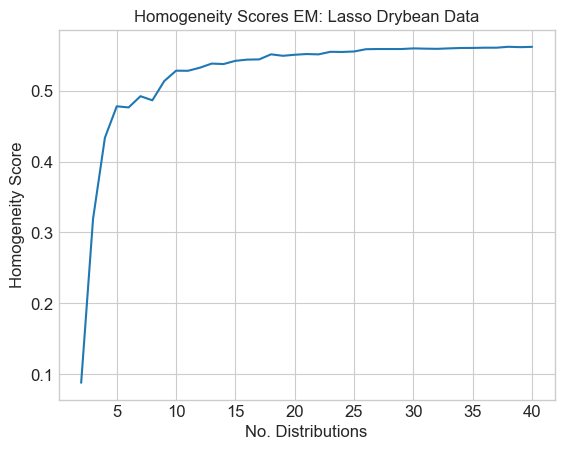

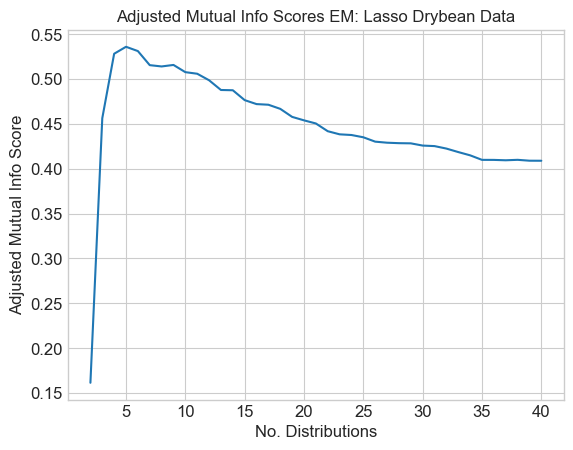

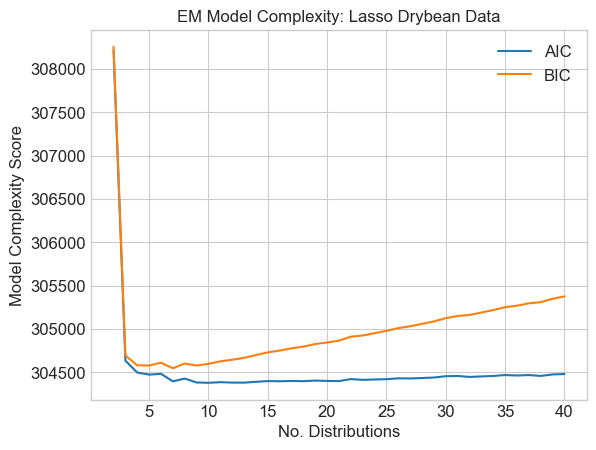

In [83]:
run_EM(pca_dry,y_dry,'PCA Drybean Data')
run_EM(ica_dry,y_dry,'ICA Drybean Data')
run_EM(rca_dry,y_dry,'RCA Drybean Data')
run_EM(lasso_dry,y_dry,'Lasso Drybean Data')

In [89]:
evaluate_EM(GM(n_components=3,covariance_type='full',n_init=1,warm_start=True,random_state=100),pca_dry,y_dry)
evaluate_EM(GM(n_components=2,covariance_type='full',n_init=1,warm_start=True,random_state=100),ica_dry,y_dry)
evaluate_EM(GM(n_components=2,covariance_type='full',n_init=1,warm_start=True,random_state=100),rca_dry,y_dry)
evaluate_EM(GM(n_components=2,covariance_type='full',n_init=1,warm_start=True,random_state=100),lasso_dry,y_dry)

Model Evaluation Metrics
*****************************************************
time	silhouette	homo	AMI
0.308s	0.444	0.355	0.492
*****************************************************
Model Evaluation Metrics
*****************************************************
time	silhouette	homo	AMI
1.428s	0.143	0.321	0.469
*****************************************************
Model Evaluation Metrics
*****************************************************
time	silhouette	homo	AMI
0.390s	0.376	0.319	0.467
*****************************************************
Model Evaluation Metrics
*****************************************************
time	silhouette	homo	AMI
0.015s	0.841	0.088	0.161
*****************************************************


## Neural Network
Applied Neural Network on one of dataset in Assignment 1 which has feature reduced. The drybean dataset is used.

In [20]:
from sklearn.neural_network import MLPClassifier

def hyperNN(X_train, y_train, X_test, y_test, title):

    f1_test = []
    f1_train = []
    hlist = np.linspace(1,30,15).astype('int')
    for i in hlist:
            clf = MLPClassifier(hidden_layer_sizes=(i,), solver='adam', activation='relu',
                                learning_rate_init=0.05, random_state=100, max_iter=500)
            clf.fit(X_train, y_train)
            y_pred_test = clf.predict(X_test)
            y_pred_train = clf.predict(X_train)
            f1_test.append(f1_score(y_test, y_pred_test, average='weighted'))
            f1_train.append(f1_score(y_train, y_pred_train, average='weighted'))

    plt.plot(hlist, f1_test, 'o-', color='r', label='Test F1 Score')
    plt.plot(hlist, f1_train, 'o-', color = 'b', label='Train F1 Score')
    plt.ylabel('Model F1 Score')
    plt.xlabel('No. Neurons')

    plt.title(title)
    plt.legend(loc='best')
    plt.show()


def NNGridSearchCV(X_train, y_train):
    #parameters to search:
    #number of hidden units
    #learning_rate
    h_units = np.linspace(1,30,15).astype('int')
    param_grid = {'hidden_layer_sizes': h_units}
    # 5-fold cross validation
    net = GridSearchCV(estimator = MLPClassifier(solver='adam',activation='relu',random_state=100, max_iter=500, learning_rate_init=0.01),
                       param_grid=param_grid, cv=5, scoring="balanced_accuracy")
    net.fit(X_train, y_train)
    print("Per Hyperparameter tuning, best parameters are:")
    print(net.best_params_)
    return net.best_params_['hidden_layer_sizes']

/Users/wind/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/wind/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/wind/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/wind/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't conv

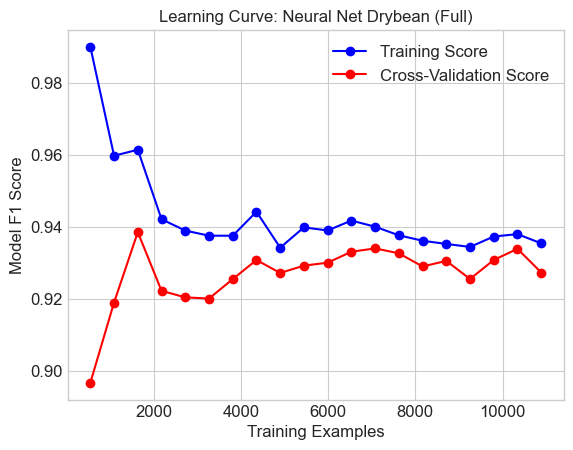

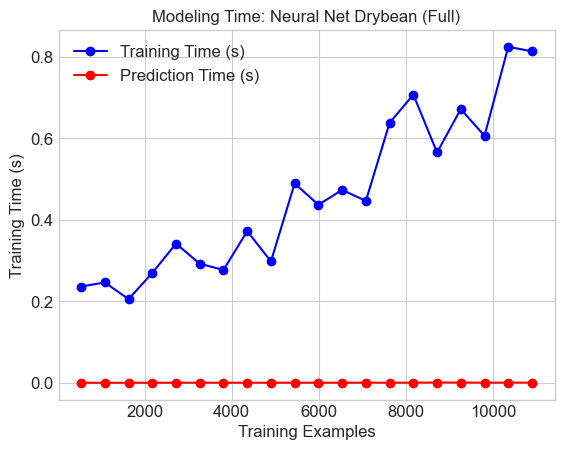

Model Evaluation Metrics Using Test Dataset
*****************************************************
Model Training Time (s):   0.55837
Model Prediction Time (s): 0.01546

F1 Score:  0.94
Balanced Accuracy:  0.94     AUC:       1.00
Precision: 0.94     Recall:    0.94
*****************************************************


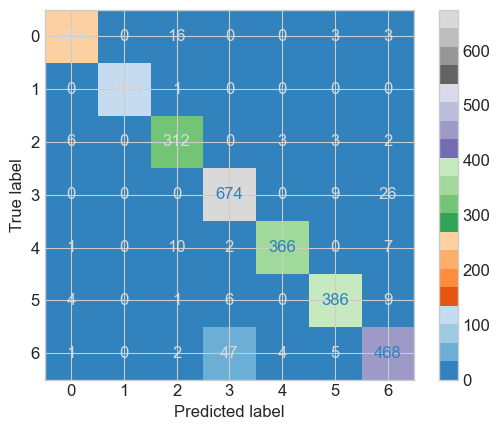

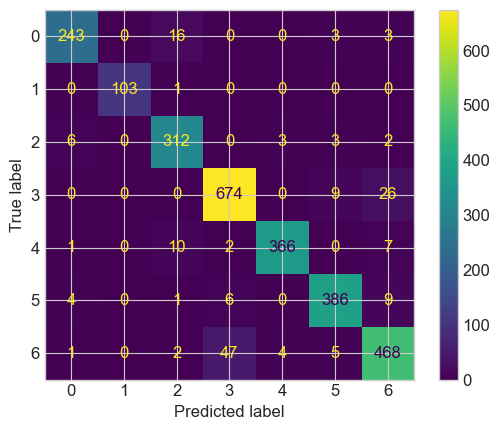

In [68]:
# Original, full dataset
X_train, X_test, y_train, y_test = train_test_split(np.array(X_dry), np.array(y_dry), test_size = 0.2, random_state = 100, stratify=y_dry)

# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

full_est = MLPClassifier(hidden_layer_sizes=(17,), solver='adam', activation='relu', learning_rate_init=0.01, random_state=100, max_iter=500)
train_samp_full, NN_fit_time_full, NN_pred_time_full = plot_learning_curve(full_est, X_train, y_train, title="Neural Net Drybean (Full)")
final_classifier_evaluation(full_est, X_train, X_test, y_train, y_test)

/Users/wind/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


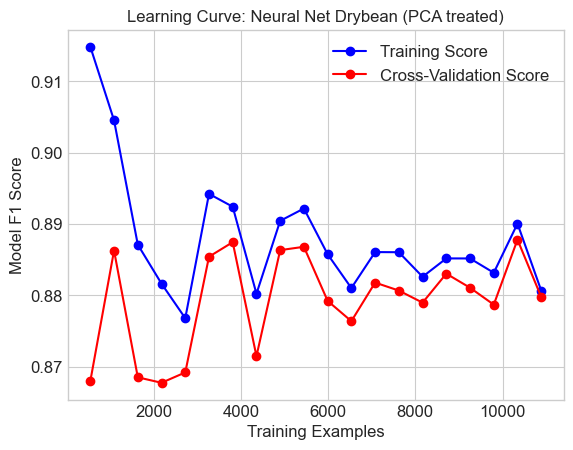

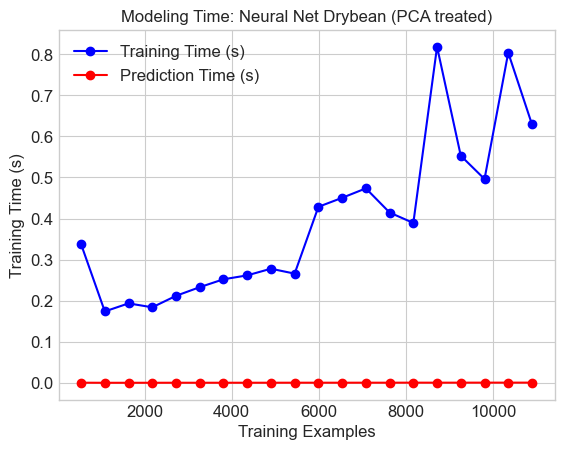

Model Evaluation Metrics Using Test Dataset
*****************************************************
Model Training Time (s):   0.41343
Model Prediction Time (s): 0.00281

F1 Score:  0.89
Balanced Accuracy:  0.89     AUC:       0.99
Precision: 0.89     Recall:    0.89
*****************************************************


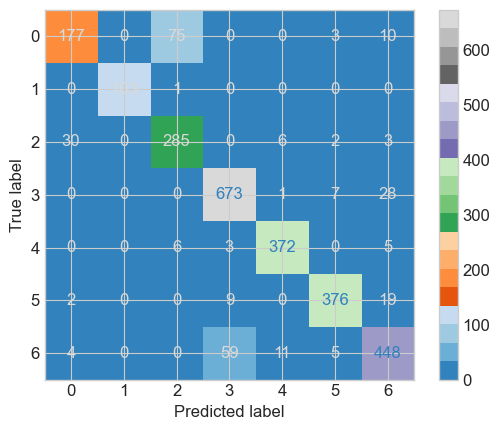

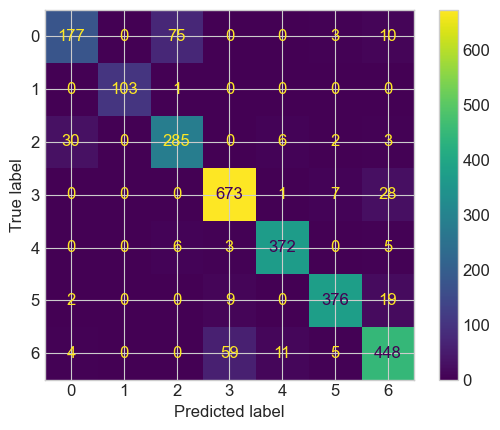

In [73]:
# PCA treated dataset
X_train, X_test, y_train, y_test = train_test_split(np.array(pca_dry), np.array(y_dry), test_size = 0.2, random_state = 100, stratify=y_dry)

# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

PCA_est = MLPClassifier(hidden_layer_sizes=(17,), solver='adam', activation='relu', learning_rate_init=0.01, random_state=100, max_iter=500)
train_samp_PCA, NN_fit_time_PCA, NN_pred_time_PCA = plot_learning_curve(PCA_est, X_train, y_train, title="Neural Net Drybean (PCA treated)")
final_classifier_evaluation(PCA_est, X_train, X_test, y_train, y_test)

/Users/wind/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/wind/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/wind/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/wind/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't conv

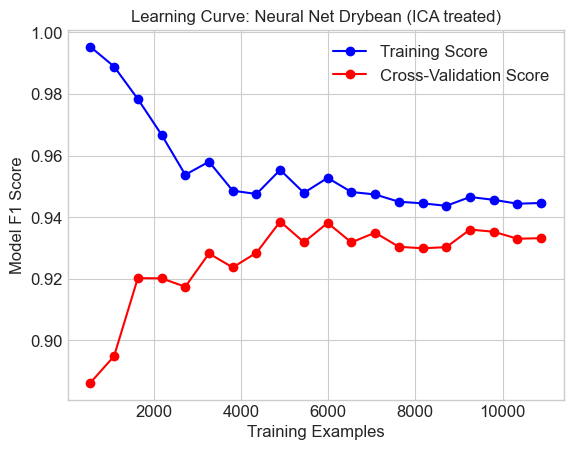

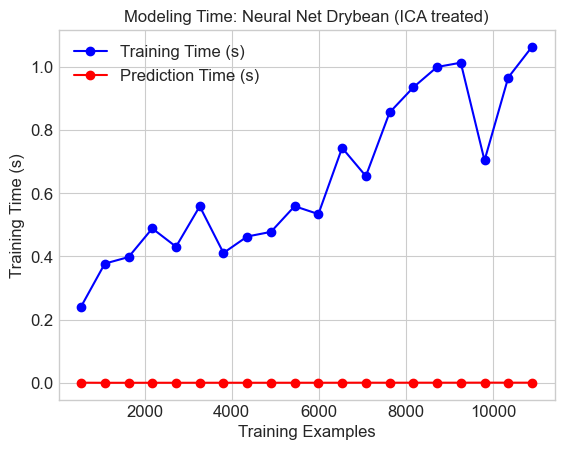

Model Evaluation Metrics Using Test Dataset
*****************************************************
Model Training Time (s):   0.36254
Model Prediction Time (s): 0.02658

F1 Score:  0.94
Balanced Accuracy:  0.94     AUC:       1.00
Precision: 0.94     Recall:    0.94
*****************************************************


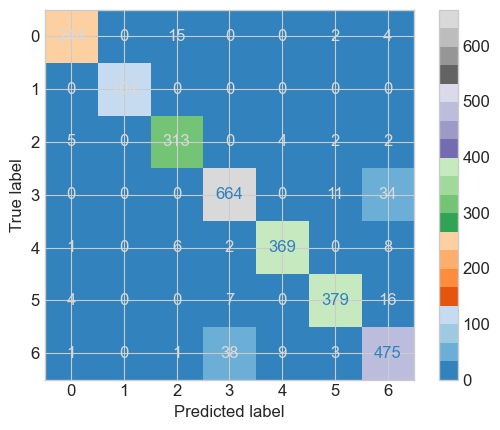

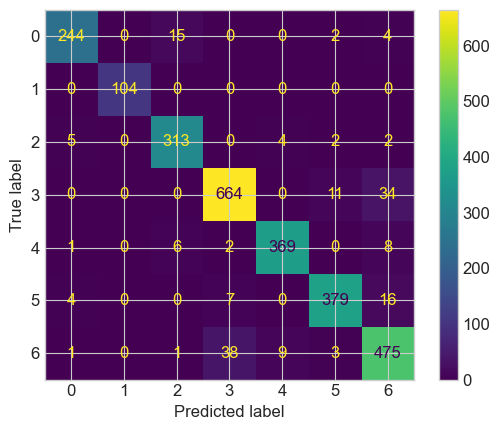

In [74]:
# ICA treated dataset
X_train, X_test, y_train, y_test = train_test_split(np.array(ica_dry), np.array(y_dry), test_size = 0.2, random_state = 100, stratify=y_dry)

# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

ICA_est = MLPClassifier(hidden_layer_sizes=(17,), solver='adam', activation='relu', learning_rate_init=0.01, random_state=100, max_iter=500)
train_samp_ICA, NN_fit_time_ICA, NN_pred_time_ICA = plot_learning_curve(ICA_est, X_train, y_train, title="Neural Net Drybean (ICA treated)")
final_classifier_evaluation(ICA_est, X_train, X_test, y_train, y_test)

/Users/wind/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/wind/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/wind/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/wind/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't conv

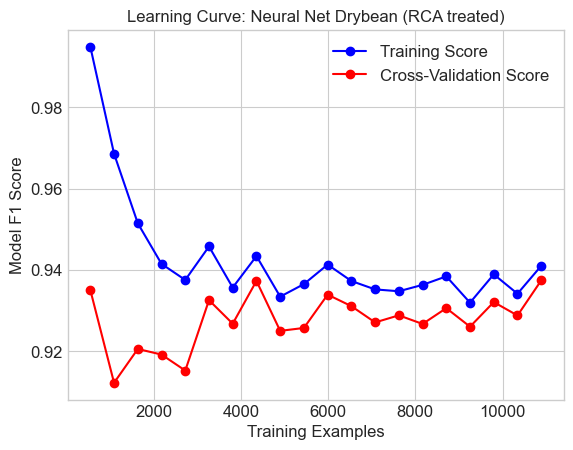

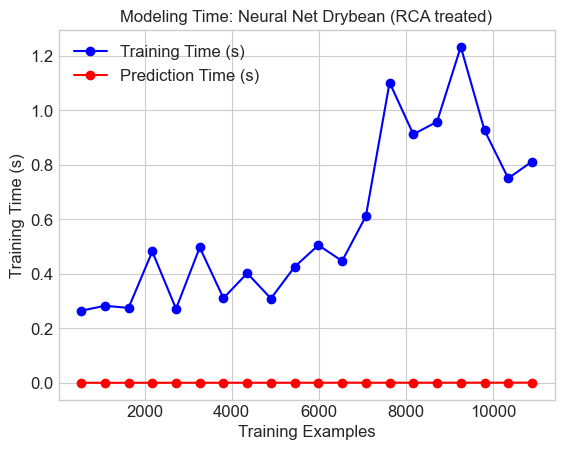

Model Evaluation Metrics Using Test Dataset
*****************************************************
Model Training Time (s):   0.61634
Model Prediction Time (s): 0.15060

F1 Score:  0.93
Balanced Accuracy:  0.93     AUC:       1.00
Precision: 0.93     Recall:    0.93
*****************************************************


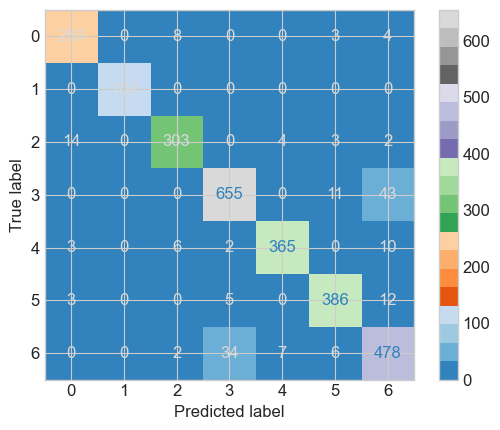

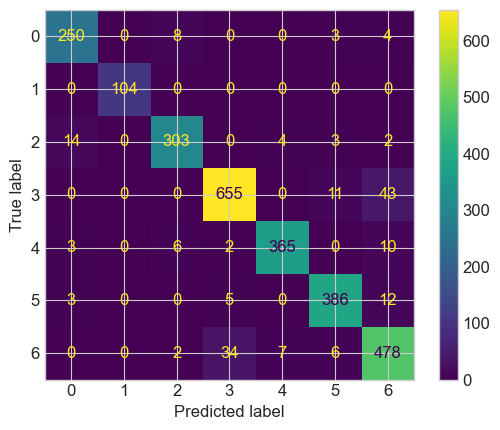

In [75]:
# RCA treated dataset
X_train, X_test, y_train, y_test = train_test_split(np.array(rca_dry), np.array(y_dry), test_size = 0.2, random_state = 100, stratify=y_dry)

# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

RCA_est = MLPClassifier(hidden_layer_sizes=(17,), solver='adam', activation='relu', learning_rate_init=0.01, random_state=100, max_iter=500)
train_samp_RCA, NN_fit_time_RCA, NN_pred_time_RCA = plot_learning_curve(RCA_est, X_train, y_train, title="Neural Net Drybean (RCA treated)")
final_classifier_evaluation(RCA_est, X_train, X_test, y_train, y_test)

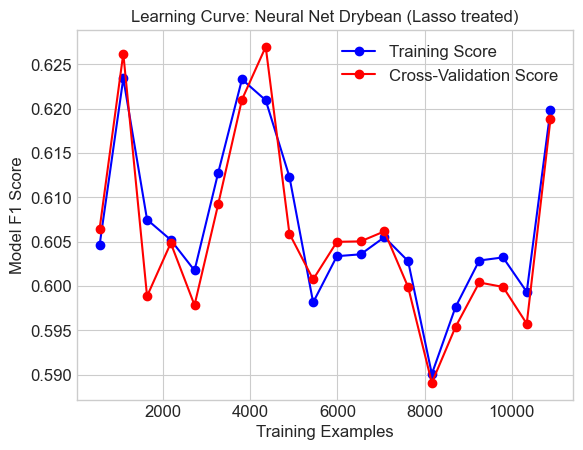

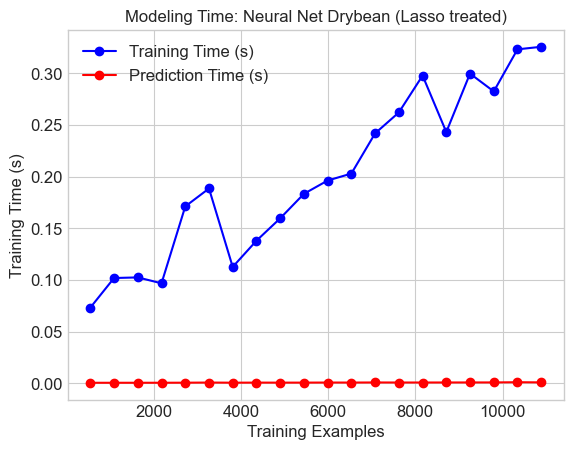

Model Evaluation Metrics Using Test Dataset
*****************************************************
Model Training Time (s):   0.27525
Model Prediction Time (s): 0.01811

F1 Score:  0.62
Balanced Accuracy:  0.64     AUC:       0.93
Precision: 0.62     Recall:    0.64
*****************************************************


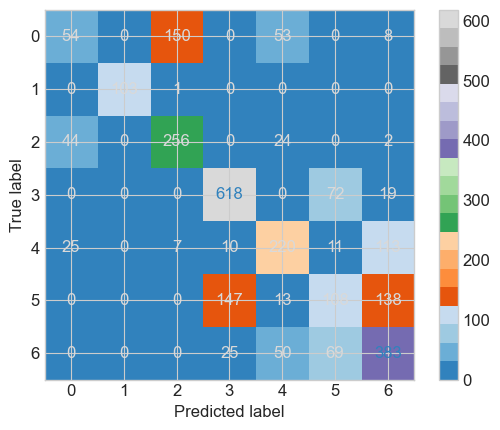

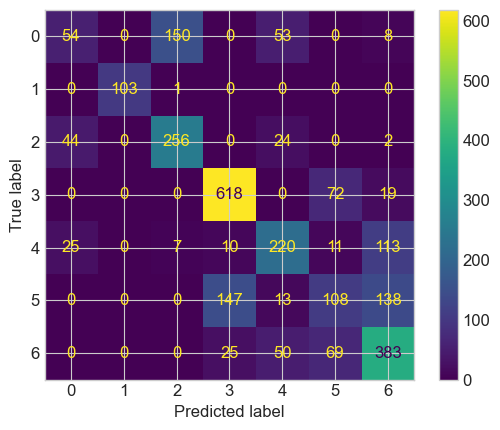

In [76]:
# Lasso treated dataset
X_train, X_test, y_train, y_test = train_test_split(np.array(lasso_dry), np.array(y_dry), test_size = 0.2, random_state = 100, stratify=y_dry)

# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Lasso_est = MLPClassifier(hidden_layer_sizes=(17,), solver='adam', activation='relu', learning_rate_init=0.01, random_state=100, max_iter=500)
train_samp_lasso, NN_fit_time_lasso, NN_pred_time_lasso = plot_learning_curve(Lasso_est, X_train, y_train, title="Neural Net Drybean (Lasso treated)")
final_classifier_evaluation(Lasso_est, X_train, X_test, y_train, y_test)

## Model Comparison Plots

Compare training times and F1 score for the 4 different NN models.

In [90]:
def compare_fit_time(n,full_fit,pca_fit,ica_fit,rca_fit,lasso_fit,title):

    plt.figure()
    plt.title("Model Training Times: " + title)
    plt.xlabel("Training Examples")
    plt.ylabel("Model Training Time (s)")
    plt.plot(n, full_fit, '-', color="k", label="Full Dataset")
    plt.plot(n, pca_fit, '-', color="b", label="PCA")
    plt.plot(n, ica_fit, '-', color="r", label="ICA")
    plt.plot(n, rca_fit, '-', color="g", label="RCA")
    plt.plot(n, lasso_fit, '-', color="m", label="Lasso")
    plt.legend(loc="best")
    plt.show()

def compare_pred_time(n,full_pred, pca_pred, ica_pred, rca_pred, lasso_pred, title):

    plt.figure()
    plt.title("Model Prediction Times: " + title)
    plt.xlabel("Training Examples")
    plt.ylabel("Model Prediction Time (s)")
    plt.plot(n, full_pred, '-', color="k", label="Full Dataset")
    plt.plot(n, pca_pred, '-', color="b", label="PCA")
    plt.plot(n, ica_pred, '-', color="r", label="ICA")
    plt.plot(n, rca_pred, '-', color="g", label="RCA")
    plt.plot(n, lasso_pred, '-', color="m", label="Lasso")
    plt.legend(loc="best")
    plt.show()

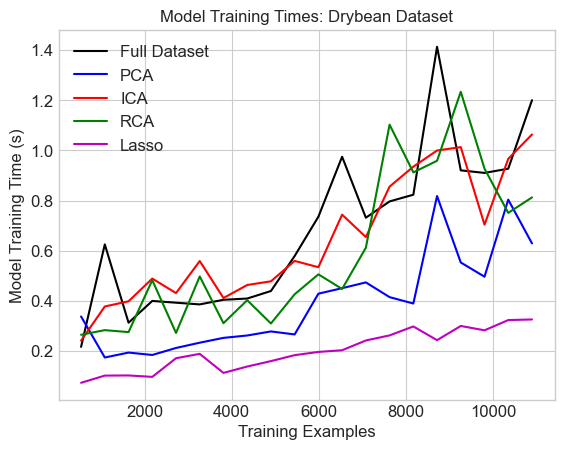

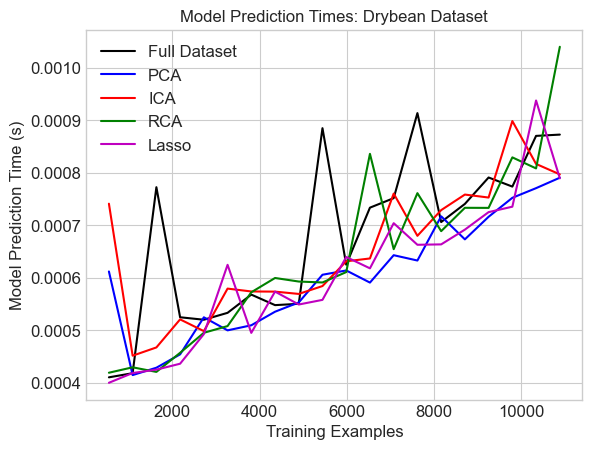

In [91]:
compare_fit_time(train_samp_full, NN_fit_time_full, NN_fit_time_PCA, NN_fit_time_ICA,
                 NN_fit_time_RCA, NN_fit_time_lasso, 'Drybean Dataset')
compare_pred_time(train_samp_full, NN_pred_time_full, NN_pred_time_PCA, NN_pred_time_ICA,
                 NN_pred_time_RCA, NN_pred_time_lasso, 'Drybean Dataset')

## Training Neural Network on Projected Data with Cluster Labels

In [92]:
def addclusters(X, km_labels, em_labels):

    df = pd.DataFrame(X)
    df['KM Cluster'] = km_labels
    df['EM Cluster'] = em_labels
    col_1hot = ['KM Cluster', 'EM Cluster']
    df_1hot = df[col_1hot]
    df_1hot = pd.get_dummies(df_1hot).astype('category')
    df_others = df.drop(col_1hot,axis=1)
    df = pd.concat([df_others,df_1hot],axis=1)
    new_X = np.array(df.values,dtype='int64')

    return new_X

In [95]:
km = KMeans(n_clusters=3,n_init=10,random_state=100).fit(X_dry)
km_labels = km.labels_
em = GM(n_components=3,covariance_type='full',n_init=1,warm_start=True,random_state=100).fit(X_dry)
em_labels = em.predict(X_dry)

clust_full = addclusters(X_dry,km_labels,em_labels)
clust_pca = addclusters(pca_dry,km_labels,em_labels)
clust_ica = addclusters(ica_dry,km_labels,em_labels)
clust_rca = addclusters(rca_dry,km_labels,em_labels)
clust_lasso = addclusters(lasso_dry,km_labels,em_labels)

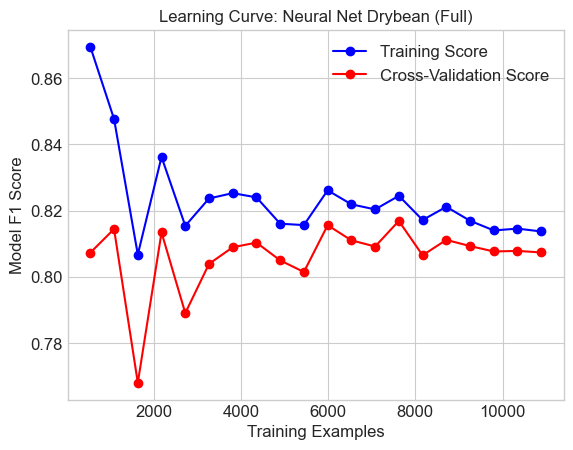

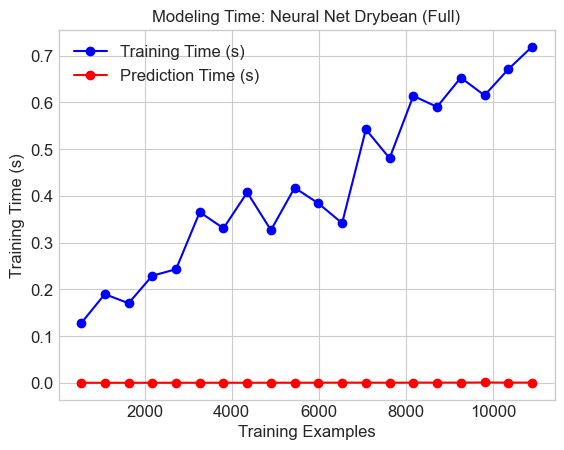

Model Evaluation Metrics Using Test Dataset
*****************************************************
Model Training Time (s):   0.75167
Model Prediction Time (s): 0.07809

F1 Score:  0.83
Balanced Accuracy:  0.82     AUC:       0.98
Precision: 0.87     Recall:    0.82
*****************************************************


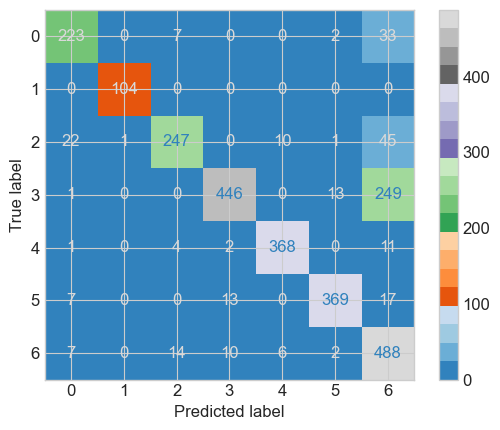

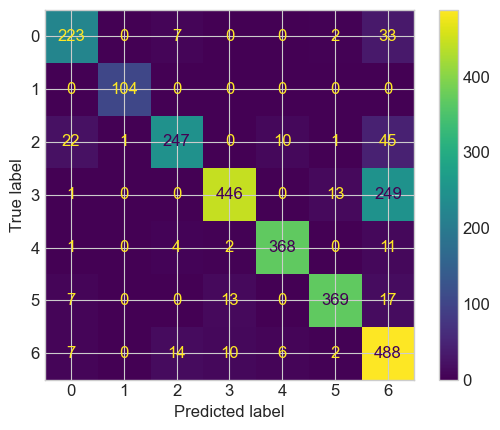

In [96]:
# Full dataset
X_train, X_test, y_train, y_test = train_test_split(np.array(clust_full), np.array(y_dry), test_size = 0.2, random_state = 100, stratify=y_dry)

# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

full_est = MLPClassifier(hidden_layer_sizes=(17,), solver='adam', activation='relu', learning_rate_init=0.01, random_state=100, max_iter=500)
train_samp_full, NN_fit_time_full, NN_pred_time_full = plot_learning_curve(full_est, X_train, y_train, title="Neural Net Drybean (Full)")
final_classifier_evaluation(full_est, X_train, X_test, y_train, y_test)

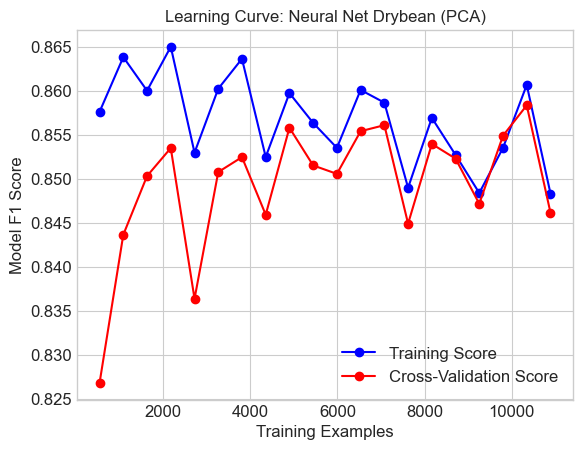

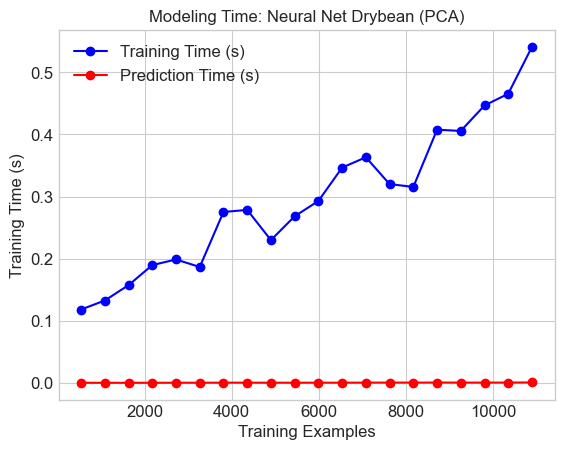

Model Evaluation Metrics Using Test Dataset
*****************************************************
Model Training Time (s):   0.39972
Model Prediction Time (s): 0.02144

F1 Score:  0.86
Balanced Accuracy:  0.86     AUC:       0.98
Precision: 0.86     Recall:    0.86
*****************************************************


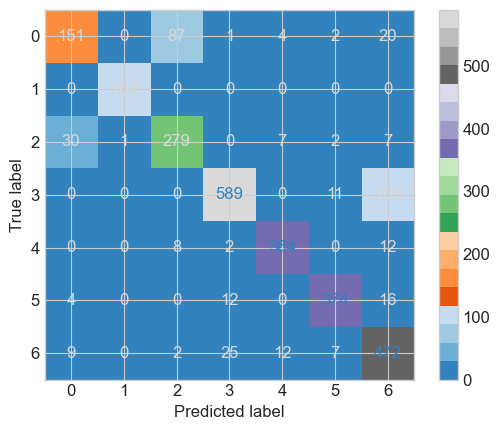

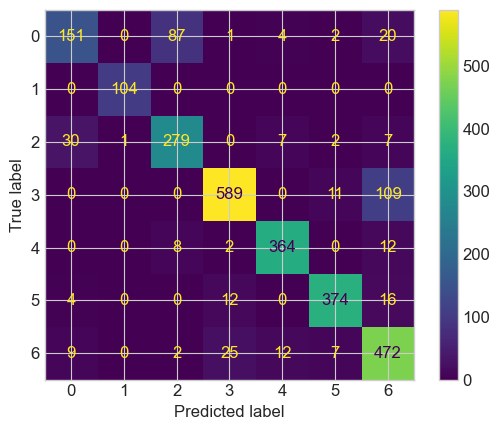

In [97]:
# PCA dataset
X_train, X_test, y_train, y_test = train_test_split(np.array(clust_pca), np.array(y_dry), test_size = 0.2, random_state = 100, stratify=y_dry)

# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pca_est = MLPClassifier(hidden_layer_sizes=(17,), solver='adam', activation='relu', learning_rate_init=0.01, random_state=100, max_iter=500)
train_samp_pca, NN_fit_time_pca, NN_pred_time_pca = plot_learning_curve(pca_est, X_train, y_train, title="Neural Net Drybean (PCA)")
final_classifier_evaluation(pca_est, X_train, X_test, y_train, y_test)

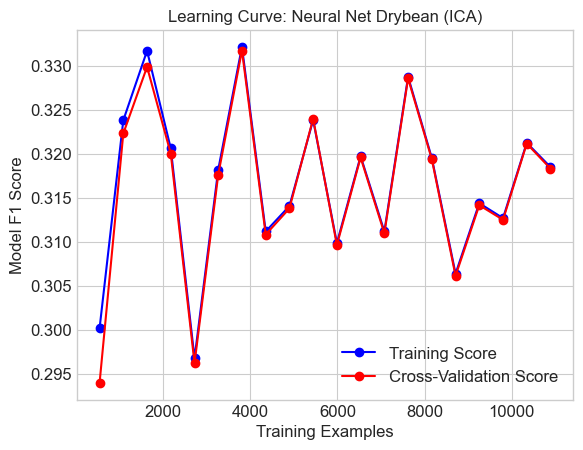

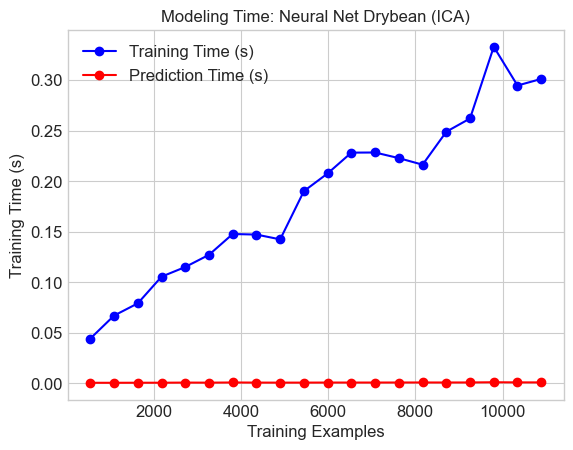

Model Evaluation Metrics Using Test Dataset
*****************************************************
Model Training Time (s):   0.19933
Model Prediction Time (s): 0.03435

F1 Score:  0.32
Balanced Accuracy:  0.46     AUC:       0.83
Precision: 0.43     Recall:    0.46
*****************************************************


/Users/wind/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


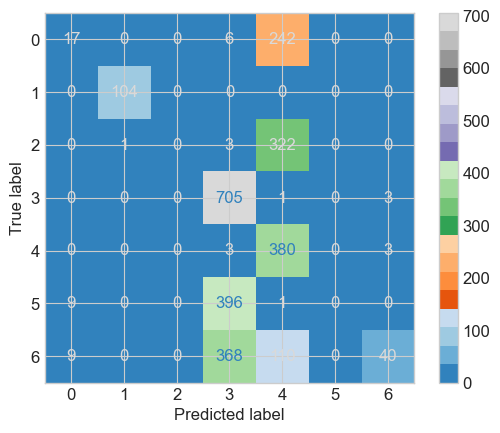

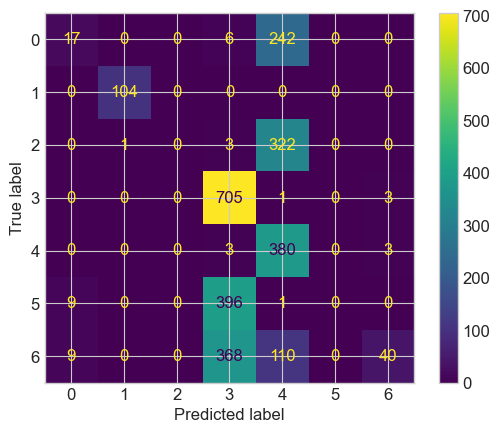

In [98]:
# ICA dataset
X_train, X_test, y_train, y_test = train_test_split(np.array(clust_ica), np.array(y_dry), test_size = 0.2, random_state = 100, stratify=y_dry)

# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

ica_est = MLPClassifier(hidden_layer_sizes=(17,), solver='adam', activation='relu', learning_rate_init=0.01, random_state=100, max_iter=500)
train_samp_ica, NN_fit_time_ica, NN_pred_time_ica = plot_learning_curve(ica_est, X_train, y_train, title="Neural Net Drybean (ICA)")
final_classifier_evaluation(ica_est, X_train, X_test, y_train, y_test)

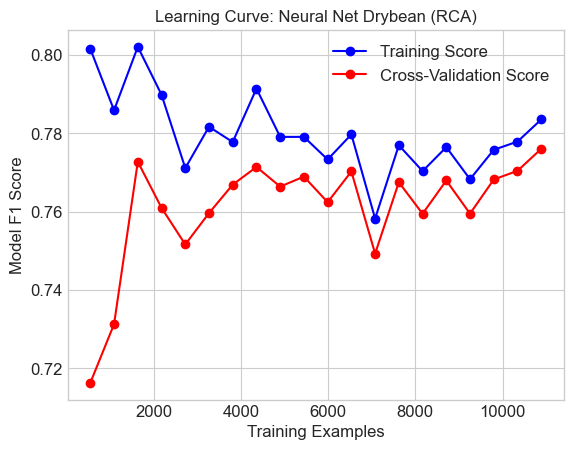

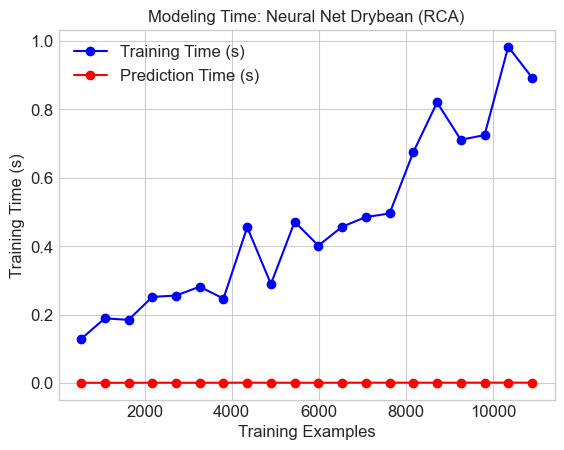

Model Evaluation Metrics Using Test Dataset
*****************************************************
Model Training Time (s):   0.56685
Model Prediction Time (s): 0.02582

F1 Score:  0.78
Balanced Accuracy:  0.77     AUC:       0.97
Precision: 0.79     Recall:    0.77
*****************************************************


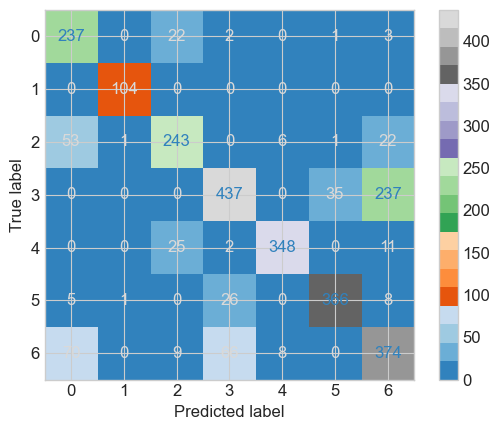

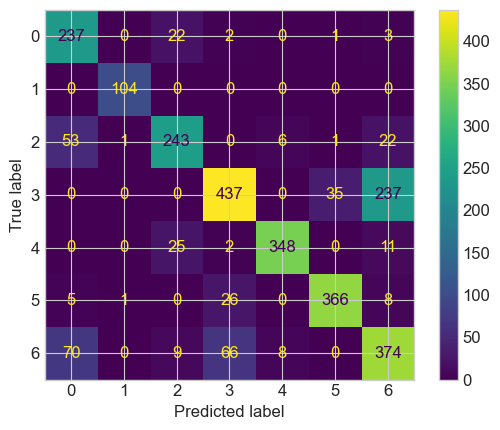

In [99]:
# RCA dataset
X_train, X_test, y_train, y_test = train_test_split(np.array(clust_rca), np.array(y_dry), test_size = 0.2, random_state = 100, stratify=y_dry)

# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

rca_est = MLPClassifier(hidden_layer_sizes=(17,), solver='adam', activation='relu', learning_rate_init=0.01, random_state=100, max_iter=500)
train_samp_rca, NN_fit_time_rca, NN_pred_time_rca = plot_learning_curve(rca_est, X_train, y_train, title="Neural Net Drybean (RCA)")
final_classifier_evaluation(rca_est, X_train, X_test, y_train, y_test)

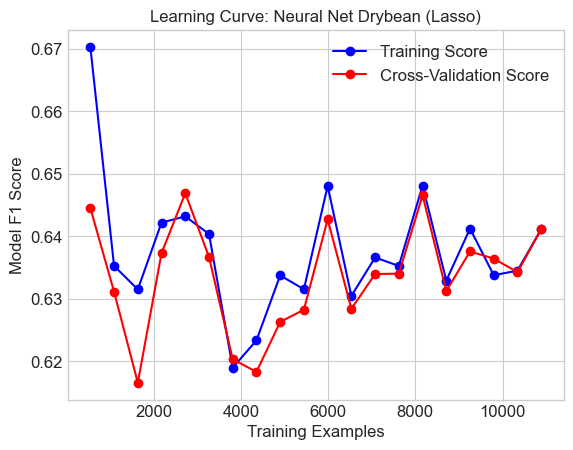

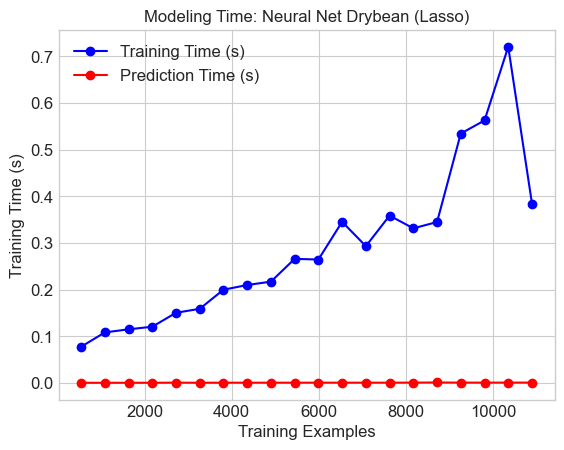

Model Evaluation Metrics Using Test Dataset
*****************************************************
Model Training Time (s):   0.35611
Model Prediction Time (s): 0.01454

F1 Score:  0.63
Balanced Accuracy:  0.67     AUC:       0.94
Precision: 0.65     Recall:    0.67
*****************************************************


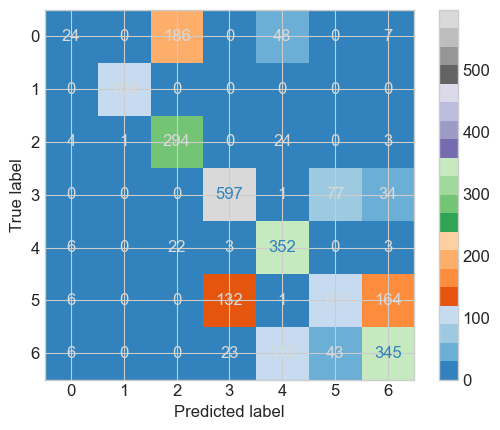

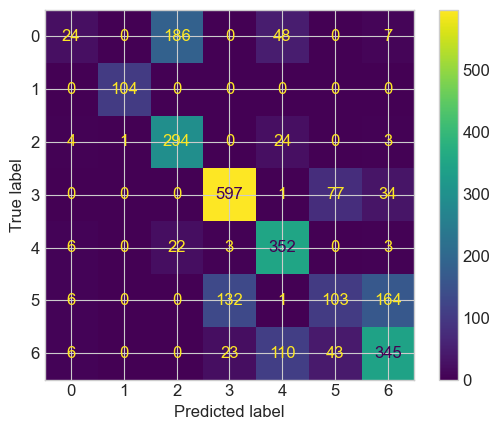

In [100]:
# Lasso dataset
X_train, X_test, y_train, y_test = train_test_split(np.array(clust_lasso), np.array(y_dry), test_size = 0.2, random_state = 100, stratify=y_dry)

# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lasso_est = MLPClassifier(hidden_layer_sizes=(17,), solver='adam', activation='relu', learning_rate_init=0.01, random_state=100, max_iter=500)
train_samp_lasso, NN_fit_time_lasso, NN_pred_time_lasso = plot_learning_curve(lasso_est, X_train, y_train, title="Neural Net Drybean (Lasso)")
final_classifier_evaluation(lasso_est, X_train, X_test, y_train, y_test)

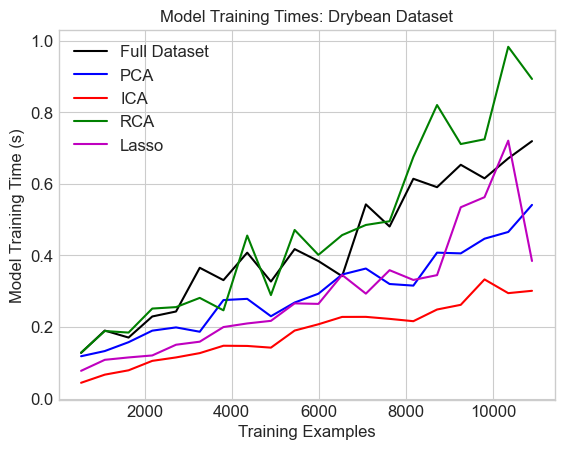

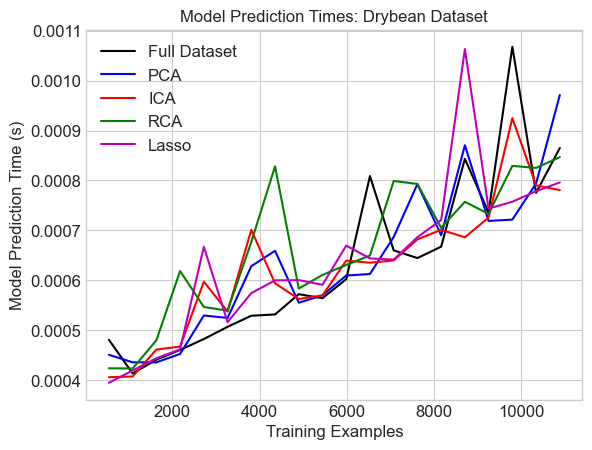

In [101]:
compare_fit_time(train_samp_full, NN_fit_time_full, NN_fit_time_pca, NN_fit_time_ica,
                 NN_fit_time_rca, NN_fit_time_lasso, 'Drybean Dataset')
compare_pred_time(train_samp_full, NN_pred_time_full, NN_pred_time_pca, NN_pred_time_ica,
                 NN_pred_time_rca, NN_pred_time_lasso, 'Drybean Dataset')